In [58]:
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

# from sklearn.preprocessing import StandardScaler, binarize, LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold 
import sklearn.metrics as metrics


import plotly.express as px
import statsmodels.api as sm

%matplotlib inline

<img src='logo/digital-house_original.png' align='center' width=35%/> 

<h3 style="color:rgb(color:rgb(0,0,0)" align='right'><b>26/01/2023</b></h3>
<h1 style="color:rgb(255,0,0)" align='center'><b>EQUIPO 4</b></h1>
<h2 style="color:rgb(0,0,0)" align='center'><b>LAURA VIVIANA RUA</b></h2>
<h2 style="color:rgb(0,0,0)" align='center'><b>CARLOS HELI</b></h2>
<h2 style="color:rgb(0,0,0)" align='center'><b>DIEGO FONSECA</b></h2>
<h2 style="color:rgb(0,0,0)" align='center'><b>LIAM O'KON</b></h2>
<h2 style="color:rgb(0,0,0)" align='center'><b>DIEGO FONSECA</b></h2>

_______________________________________________________________________________________________________________________________________________
<h1 style="color:rgb(255,0,0)" align='left'><b>1. PROYECTO INTEGRADOR FINAL</b></h1>
<h1>TEMA DE INVESTIGACIÓN: PREDECIR EL RENDIMIENTO DE LOS ESTUDIANTES EN LA EDUCACIÓN SECUNDARIA</h1>

### **ANTECEDENTES**

La educación es un factor clave para lograr el progreso económico a largo plazo. Durante las últimas décadas, el nivel educativo portugués ha mejorado. Sin embargo, las estadísticas mantienen a Portugal en la cola de Europa debido a sus altas tasas de fracaso estudiantil y abandono escolar. Por ejemplo, en 2006, la tasa de abandono escolar prematuro en Portugal era del 40 % para los jóvenes de 18 a 24 años, mientras que el valor medio de la Unión Europea era sólo del 15 % (Eurostat 2007). En particular, el fracaso en las asignaturas transversales de Matemáticas y Portugués (la lengua materna) es extremadamente grave, ya que estas proporcionan conocimientos fundamentales para el éxito en las demás asignaturas escolares (por ejemplo en historia o física).
En Portugal, la educación secundaria consta de 3 años de escolaridad, precediendo a 9 años de educación básica y seguidos de educación superior. La mayoría de los estudiantes se incorporan al sistema educativo público. Hay varios programas o cursos (por ejemplo, Ciencias y Tecnologías, Artes Visuales, etc.) que comparten materias básicas como la Lengua Portuguesa y las Matemáticas. Al igual que otros países (por ejemplo, Francia), se utiliza la escala de calificación de 20 puntos, donde 0 es la calificación más baja y 20 es la puntuación perfecta. Durante el año escolar, los estudiantes son evaluados en tres períodos (G1 - G2 - G3) y la última evaluación corresponde a la nota final.


### **DISPONIBILIDAD DE DATOS E INFRAESTRUCTURA**

Los datos recopilados corresponden a los periodos escolares del año 2005-2006 de dos escuelas públicas GABRIEL PEREIRA y MOUSINHO DA SILVEIRA, de la región de Alentejo de Portugal. Aunque se ha presentado aumento en la inversión en tecnología de la información por parte del gobierno, la mayoría de los sistemas de información de las escuelas públicas portuguesas son muy deficientes y dependen principalmente en hojas de papel (que es el caso actual).
La base de datos se construyó a partir de dos fuentes: informes escolares, basados en hojas de papel e incluyendo algunos atributos (es decir, las calificaciones de los tres períodos y el número de ausencias escolares); y cuestionarios, utilizados para complementar la información.
El cuestionario se diseñó con preguntas cerradas relacionadas con varios aspectos demográficos (p. ej., educación de la madre, ingresos familiares), sociales /emocionales (p. ej., consumo de alcohol) (Pritchard y Wilson 2003) y relacionados con la escuela (p. ej., número de fracasos en clases anteriores) variables que se esperaba afectaran el desempeño de los estudiantes.

El cuestionario fue probado en un grupo pequeño de 15 estudiantes y luego fue revisado por profesionales de la escuela para obtener retroalimentación.
La versión final contenía 37 preguntas en una sola hoja A4 y fue respondida en clase por 788 alumnos. Posteriormente, 111 respuestas fueron descartadas por falta de datos de identificación.

Finalmente, los datos fueron integrados en dos datasets relacionados con las asignaturas de Matemáticas (con 395 registros) y de Lengua Portuguesa (649 registros).

Durante la etapa de preprocesamiento, se descartaron algunas características debido a la falta de valor discriminativo. Por ejemplo, pocos encuestados respondieron sobre sus ingresos familiares (probablemente por cuestiones de privacidad), mientras que casi el 100% de los estudiantes viven con sus padres y también tienen una computadora personal en casa.

La base de datos se encuentra en el repositorio UCI en el siguiente link:

https://archive.ics.uci.edu/ml/datasets/student+performance#.

El autor es P. Cortez y la referencia es:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
Los datasets son dos conjuntos de datos sobre el rendimiento en las dos asignaturas: Matemáticas (student-mat.csv) y lengua portuguesa (student-por.csv).

### **APORTE ESPERADO**

Todos los datos contienen información valiosa, como tendencias y patrones, que se pueden utilizar para mejorar la toma de decisiones sobre aspectos importantes en la educación.

Para el ámbito educativo se pueden evaluar diferentes situaciones con datos generados por los estudiantes, los profesores, los administradores de las escuelas o por los exalumnos. En nuestro trabajo nos concentraremos en realizar una evaluación con modelos de Machine Learning relacionado con los estudiantes.

Con este trabajo se pueden abordar algunas preguntas que aporten al mejoramiento del proceso de la educación en Portugal. Por ejemplo:

¿Quiénes son los estudiantes que toman más horas de crédito?

¿Quién es probable que regrese para más clases?

¿Qué tipo de cursos se pueden ofrecer para atraer a más estudiantes?

¿Cuáles son las principales razones de los traslados de estudiantes?

**¿Es posible predecir el rendimiento de los estudiantes?**

Es decir predecir el valor de la nota del estudiente, dependiento de algunas características que los determina.

**¿Cuáles son los factores que afectan el rendimiento de los estudiantes?**

Identificar cuales son los elementos que ayudar a un estudiante a obtener una nota favorable.

Consideramos que las últimas dos preguntas son muy importantes, para nuestro ejercicio vamos a resolver ambas por nuestro equipo de Data Science y para ello es necesario modelar el desempeño de los estudiantes evaluando la variable 'G3' con modelos de regresión y ganaron/perdieron con modelos de clasificación. 


### **BASE DE DATOS**

La base de datos se encuentra en el repositorio UCI en el siguiente link:

https://archive.ics.uci.edu/ml/datasets/student+performance#

### **CARACTERÍSTICAS**

Para ambos datasets student-mat.csv (Curso de Matematicas) y student-por.csv (Curso lengua portuguesa) contienen las siguientes características:

**1 school** - Escuela del Estudiante (categórica: "GP" - Gabriel Pereira o "MS" - Mousinho da Silveira)

**2 sex** - Sexo del Estudiante (categórica: "F" - femenino o "M" - masculino)

**3 age** - Edad del Estudiante (numérico: desde 15 hasta 22)

**4 address** - Tipo de población o localidad de domicilio del estudiante (categórica: "U" - urbano o "R" - rural)

**5 famsize** - Tamaño de la familia (categórica: "LE3" - <= 3 o "GT3" - > 3)

**6 Pstatus** - Estado de convivencia de los padres (categórica: "T" - viven junto or "A" - viven aparte)

**7 Medu** - Educación de la madre (numérico: 0 - ninguno,  1- primaria(4to grado), 2– 5to a 9no grado, 3– secundaria  or 4 – educación superior)

**8 Fedu** - Educación del padre (numérico: 0 - ninguno,  1- primaria(4to grado), 2– 5to a 9no grado, 3– secundaria  or 4 – educación superior)

**9 Mjob** - Trabajo de la madre (categórica: "teacher", "health" relacionado con el cuidado, civil "services" (e.g. administrativo o policía), "at_home" o "other")

**10 Fjob** - Trabajo del Padre (categórica: "teacher", "health" relacionado con el cuidado, civil "services" (e.g. administrativo o policía), "at_home" o "other")

**11 reason** - Razón para elegir esta escuela (categórica: cerca de casa "home", reputación escuela "reputation", "course" preferencia o "other")

**12 guardian** - Tutor del estudiante (categórica: "mother", "father" or "other")

**13 traveltime** - Tiempo de viaje de la casa a la escuela (numérico: 1- <15 min., 2- 15 a 30 min., 3- 30 min. a 1 hora, o 4- >1 hora)

**14 studytime** - Tiempo dedicado al estudio en la semana (numérico: 1- <2 horas, 2- 2 a 5 horas, 3- 5 a 10 horas, o 4- >10 horas)

**15 failures** - Número de fracasos de clases anteriores (numérico: n if 1 <= n else 4)

**16 schoolsup** - Apoyo educativo adicional (categórica: yes o no)

**17 famsup** - Apoyo educativo familiar (categórica: yes o no)

**18 paid** - Clases extra pagadas dentro de la materia del curso (Math or Portuguese) (categórica: yes o no)

**19 activities** - Actividades extracurriculares (categórica: yes o no)

**20 nursery** - El estudiante asistio a guardería (categórica: yes o no)

**21 higher** - Quiere estudiar educación superior (categórica: yes o no)

**22 internet** - Tiene acceso a internet en casa (categórica: yes o no)

**23 romantic** - Con una relacion romantica (categórica: yes o no)

**24 famrel** - Calidad de las relaciones familiares (numérico: desde 1- muy malo hasta 5- excelente)

**25 freetime** - Tiempo libre despues de la escuela (numérico: desde 1- muy bajo hasta 5- muy alto)

**26 goout** - Saliendo con amigos (numérico: desde 1- muy bajo hasta 5- muy alto)

**27 Dalc** - Consumo de alcohol en jornada laboral (numérico: desde 1- muy bajo hasta 5- muy alto)

**28 Walc** - Consumo de alcohol el fin de semana (numérico: desde 1- muy bajo hasta 5- muy alto)

**29 health** - Estado de salud actual (numérico: desde 1- muy malo hasta 5- muy bueno)

**30 absences** - Número de ausencias escolares (numérico: desde 0 hasta 93)

**Las calificaciones están relacionadas con la materia del curso, Matemáticas o Portugués:**

**31 G1** - Primer periodo (numérico: desde 0 hasta 20)

**31 G2** - Segundo periodo (numérico: desde 0 hasta 20)

**32 G3** - Calificación final (numérico: desde 0 hasta 20)

____________________________________________________________________________________________

<h1 style="color:rgb(255,0,0)" align='left'><b>2. PREPROCESAMIENTO DE LOS DATOS</b></h1>

### **OBTENCIÓN DE LA BASE DE DATOS**

La base de datos es distribuida en dos datasets nombrados por materias y de extensión csv. El dataset student-mat.csv corresponde a estudiantes de matemáticas y student-por.csv a estudiantes de lengua portuguesa, en ambos datasets contienen estudiantes de las escuelas "GP" - Gabriel Pereira y "MS" - Mousinho da Silveira. Utilizamos la instrucción *pd.read_csv*

In [5]:
# Ruta ubicación de los dataset
path_data ='./data/student/'
# # Obtenemos el Dataset de Matemática
data_math = pd.read_csv(path_data + 'student-mat.csv', sep =';')
# Obtenemos el tamaño del contenido del dataset Matemática
data_math.shape

(395, 33)

In [6]:
# Asignamos a cada registro a que materia corresponde M-Matemática y P-lengua portuguesa
math = list('M'*395)
data_math.insert(33, "materia", math)
data_math.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,materia
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M


In [7]:
# Obtenemos el Datasets de lengua portuguesa
data_por = pd.read_csv(path_data + 'student-por.csv', sep =';')
# Obtenemos el tamaño del contenido del data set de lengua portuguesa
data_por.shape

(649, 33)

In [8]:
# Asignamos a cada registro a que materia corresponde M-Matemática y P-lengua portuguesa
port = list('P'*649)
data_por.insert(33, "materia", port)
data_por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,materia
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,P


In [9]:
# Calculamos el tamaño de los datasets
total = data_math.shape[0] + data_por.shape[0]
print("    Datasets       Cantidad   % Repr." )
print("Matematicas      : ", data_math.shape[0],"      " ,round((data_math.shape[0]/total*100),2))
print("Lengua Portuguesa: ", data_por.shape[0],"      " ,round((data_por.shape[0]/total*100),2))
print("Total registros  : ", total)

    Datasets       Cantidad   % Repr.
Matematicas      :  395        37.84
Lengua Portuguesa:  649        62.16
Total registros  :  1044


El datasets con mayores registros son los estudiantes de lengua portuguesa que representan el 62.16% de las dos muestras obtenidas. A continuación procedemos a unir los dos datasets utilizando **pd.concat**.

In [10]:
# Unimos los dos conjuntos de datasets
df = pd.concat([data_math, data_por], ignore_index = True)
df.shape

(1044, 34)

Observamos que se vincularon correctamente los datasets por que el tamaño de los registros corresponde a los 1044 que suman ambos. A continuación, vamos a cambiar el nombre de las características con *df.rename* para una mejor comprensión y luego validamos que si estan correctamente cambiados *df.columns*.

In [11]:
# Cambiar el nombre de laa columnas
df.rename(columns={'school': 'escuela',
                   'sex': 'genero',
                   'age': 'edad',
                   'address': 'tipo_poblacion',
                   'famsize': 'tamano_familia', 
                   'Pstatus': 'estado_convivencia_padres', 
                   'Medu': 'educacion_madre', 
                   'Fedu': 'educacion_padre', 
                   'Mjob': 'trabajo_madre', 
                   'Fjob': 'trabajo_padre',
                   'reason':'eleccion_escuela',
                   'guardian':'tutor_estudiante',
                   'traveltime': 'tiempo_viaje', 
                   'studytime': 'tiempo_estudio',
                   'failures':'fracasos',
                   'schoolsup': 'apoyo_educativo_adicional', 
                   'famsup': 'apoyo_educativo_familiar', 
                   'paid': 'curso_extra_pagado', 
                   'activities': 'actividades_extracurriculares',
                   'nursery': 'asistio_guarderia', 
                   'higher': 'quiere_cursar_estudios_superiores', 
                   'internet': 'acceso_internet', 
                   'romantic': 'relacion_romantica', 
                   'famrel': 'relacion_familiar', 
                   'freetime': 'tiempo_libre_despues_escuela', 
                   'goout': 'salir_con_amigos', 
                   'Dalc': 'consumo_alcohol_jornada_laboral', 
                   'Walc': 'consumo_alcohol_fin_semana', 
                   'health': 'estado_salud_actual' , 
                   'absences':'numero_ausencias_escolares'}, inplace=True)

In [12]:
# Validamos el nombre de las columnas si fueron modificadas
print(df.columns)

Index(['escuela', 'genero', 'edad', 'tipo_poblacion', 'tamano_familia',
       'estado_convivencia_padres', 'educacion_madre', 'educacion_padre',
       'trabajo_madre', 'trabajo_padre', 'eleccion_escuela',
       'tutor_estudiante', 'tiempo_viaje', 'tiempo_estudio', 'fracasos',
       'apoyo_educativo_adicional', 'apoyo_educativo_familiar',
       'curso_extra_pagado', 'actividades_extracurriculares',
       'asistio_guarderia', 'quiere_cursar_estudios_superiores',
       'acceso_internet', 'relacion_romantica', 'relacion_familiar',
       'tiempo_libre_despues_escuela', 'salir_con_amigos',
       'consumo_alcohol_jornada_laboral', 'consumo_alcohol_fin_semana',
       'estado_salud_actual', 'numero_ausencias_escolares', 'G1', 'G2', 'G3',
       'materia'],
      dtype='object')


In [13]:
# Obtenemos una muestra del contenido del data set para evaluar los cambios 
df.head(3)

,escuela,genero,edad,tipo_poblacion,tamano_familia,estado_convivencia_padres,educacion_madre,educacion_padre,trabajo_madre,trabajo_padre,...,tiempo_libre_despues_escuela,salir_con_amigos,consumo_alcohol_jornada_laboral,consumo_alcohol_fin_semana,estado_salud_actual,numero_ausencias_escolares,G1,G2,G3,materia
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,M
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,M
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,M


El sistema de calificación en Portugal en las escuelas aplican 5 niveles:

|Nivel|I|II|III|IV|V|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Equivalencia|excellent/very good|good|satisfactory|sufficient|fail|
|Calificación|16-20|14-15|12-13|10-11|0-9|
|Aprobado|Si|Si|Si|Si|No|

El estudiante aprueba el curso a partir de 10 y se considera que pierde la asignatura si obtiene una calificación entre 0-9. Para el desarollo del modelo asignaremos una variable denominada aprobado el curso con dos categorías Si o No. Y otra columna con el nombre de la equivalencia que corresponde a las calificaciones agrupadas en las categorías excellent - good - satisfactory - sufficient - fail.

In [14]:
# Crear una columna de equivalencia 
condiciones = [(df['G3']>=16),
               (df['G3']<=15)&(df['G3']>=14),
               (df['G3']<=13)&(df['G3']>=12),
               (df['G3']<=11)&(df['G3']>=10),
               (df['G3']<=9)&(df['G3']>=0)]
equivalencia = ['I', 'II', 'III',  'IV', 'V']
df['equivalencia'] = np.select(condiciones, equivalencia)

In [15]:
# Crear una columna con estudiantes que aprobaron o desaprobaron
df['aprobado'] = np.where(df['G3']>=10,'Si', 'No')

In [16]:
# Validamos que esten incluidas la columnas creadas
df.columns

Index(['escuela', 'genero', 'edad', 'tipo_poblacion', 'tamano_familia',
       'estado_convivencia_padres', 'educacion_madre', 'educacion_padre',
       'trabajo_madre', 'trabajo_padre', 'eleccion_escuela',
       'tutor_estudiante', 'tiempo_viaje', 'tiempo_estudio', 'fracasos',
       'apoyo_educativo_adicional', 'apoyo_educativo_familiar',
       'curso_extra_pagado', 'actividades_extracurriculares',
       'asistio_guarderia', 'quiere_cursar_estudios_superiores',
       'acceso_internet', 'relacion_romantica', 'relacion_familiar',
       'tiempo_libre_despues_escuela', 'salir_con_amigos',
       'consumo_alcohol_jornada_laboral', 'consumo_alcohol_fin_semana',
       'estado_salud_actual', 'numero_ausencias_escolares', 'G1', 'G2', 'G3',
       'materia', 'equivalencia', 'aprobado'],
      dtype='object')

### **LIMPIEZA DE DATOS**

**A. PROBLEMAS DE FORMATO**

Vamos a evaluar el tipo de datos de cada característica. Si se presentan tipos de datos que no corresponden debemos cambiarlos en la Base de Datos. Vamos a utilizar *df.dtypes* con el dataset *df* que contiene ambos datasets.

In [17]:
# Información Del tipo de los Datos 
print("\n Información De Los Datos: ") 
print(df.dtypes)


 Información De Los Datos: 
escuela                              object
genero                               object
edad                                  int64
tipo_poblacion                       object
tamano_familia                       object
estado_convivencia_padres            object
educacion_madre                       int64
educacion_padre                       int64
trabajo_madre                        object
trabajo_padre                        object
eleccion_escuela                     object
tutor_estudiante                     object
tiempo_viaje                          int64
tiempo_estudio                        int64
fracasos                              int64
apoyo_educativo_adicional            object
apoyo_educativo_familiar             object
curso_extra_pagado                   object
actividades_extracurriculares        object
asistio_guarderia                    object
quiere_cursar_estudios_superiores    object
acceso_internet                      object
rel

Dentro del dataset hay variables numéricas que son categóricas  que vamos a modificar para estandarizar mejor el dataset. Las variables para modificar son: educacion_madre, educacion_padre, tiempo_viaje, tiempo_estudio, relacion_familiar, tiempo_libre_despues_escuela, salir_con_amigos, consumo_alcohol_jornada_laboral, consumo_alcohol_fin_semana, estado_salud_actual.

Como variables numéricas son: edad, fracasos, numero_ausencias_escolares, G1, G2, G3.

A continuación, vamos a realizar las modificaciones de las variables numéricas a categóricas. Primero se realiza el cambio del tipo de dato de numérico a string y luego modificamos el argumento del dato.

In [18]:
# Modificar el tipo de datos
df['educacion_madre'] = df['educacion_madre'].astype(str)
df['educacion_padre'] = df['educacion_padre'].astype(str)
df['tiempo_viaje'] = df['tiempo_viaje'].astype(str)
df['tiempo_estudio'] = df['tiempo_estudio'].astype(str)
df['relacion_familiar'] = df['relacion_familiar'].astype(str)
df['tiempo_libre_despues_escuela'] = df['tiempo_libre_despues_escuela'].astype(str)
df['salir_con_amigos'] = df['salir_con_amigos'].astype(str)
df['consumo_alcohol_jornada_laboral'] = df['consumo_alcohol_jornada_laboral'].astype(str)
df['consumo_alcohol_fin_semana'] = df['consumo_alcohol_fin_semana'].astype(str)
df['estado_salud_actual'] = df['estado_salud_actual'].astype(str) 

A continuación, validamos los cambios de tipo de formato.

In [19]:
# Información Del tipo de los Datos 
print("\n Información De Los Datos: ") 
print(df.dtypes)


 Información De Los Datos: 
escuela                              object
genero                               object
edad                                  int64
tipo_poblacion                       object
tamano_familia                       object
estado_convivencia_padres            object
educacion_madre                      object
educacion_padre                      object
trabajo_madre                        object
trabajo_padre                        object
eleccion_escuela                     object
tutor_estudiante                     object
tiempo_viaje                         object
tiempo_estudio                       object
fracasos                              int64
apoyo_educativo_adicional            object
apoyo_educativo_familiar             object
curso_extra_pagado                   object
actividades_extracurriculares        object
asistio_guarderia                    object
quiere_cursar_estudios_superiores    object
acceso_internet                      object
rel

**B. VALORES ERRÓNEOS**

Para identificar si existen valores erróneos utilizaremos *describe* para valores numéricos. Nos permite identificar valores outliers y con *unique* para identificar datos capturados erróneamente.

In [20]:
# Utilizamos describe para los cálculos estadísticos
print("Cálculos Estadísticos:") 
print(df[['edad', 'fracasos', 'numero_ausencias_escolares','G1', 'G2', 'G3']].describe().T.round(2))

Cálculos Estadísticos:
                             count   mean   std   min   25%   50%   75%   max
edad                        1044.0  16.73  1.24  15.0  16.0  17.0  18.0  22.0
fracasos                    1044.0   0.26  0.66   0.0   0.0   0.0   0.0   3.0
numero_ausencias_escolares  1044.0   4.43  6.21   0.0   0.0   2.0   6.0  75.0
G1                          1044.0  11.21  2.98   0.0   9.0  11.0  13.0  19.0
G2                          1044.0  11.25  3.29   0.0   9.0  11.0  13.0  19.0
G3                          1044.0  11.34  3.86   0.0  10.0  11.0  14.0  20.0


Evaluando las variables numéricas encontramos que los valores máximos estan muy por encima del percentil 75% esto nos indica la posibilidad de encontrar valores outliers.

In [21]:
# Obtenemos los valores duplicados de cada variable
df_obj = df[['escuela', 'genero', 'tipo_poblacion',
             'tamano_familia', 'estado_convivencia_padres', 'educacion_madre',
             'educacion_padre','trabajo_madre', 'trabajo_padre',
             'eleccion_escuela', 'tutor_estudiante', 'tiempo_viaje',
             'tiempo_estudio', 'apoyo_educativo_adicional', 'apoyo_educativo_familiar',
             'curso_extra_pagado', 'actividades_extracurriculares', 'asistio_guarderia',
             'quiere_cursar_estudios_superiores', 'acceso_internet', 'relacion_romantica',
             'materia', 'relacion_familiar', 'tiempo_libre_despues_escuela', 'salir_con_amigos',
             'consumo_alcohol_jornada_laboral','consumo_alcohol_fin_semana', 'estado_salud_actual']]
for col in df_obj:
    print(col,":", df_obj[col].unique()) 

escuela : ['GP' 'MS']
genero : ['F' 'M']
tipo_poblacion : ['U' 'R']
tamano_familia : ['GT3' 'LE3']
estado_convivencia_padres : ['A' 'T']
educacion_madre : ['4' '1' '3' '2' '0']
educacion_padre : ['4' '1' '2' '3' '0']
trabajo_madre : ['at_home' 'health' 'other' 'services' 'teacher']
trabajo_padre : ['teacher' 'other' 'services' 'health' 'at_home']
eleccion_escuela : ['course' 'other' 'home' 'reputation']
tutor_estudiante : ['mother' 'father' 'other']
tiempo_viaje : ['2' '1' '3' '4']
tiempo_estudio : ['2' '3' '1' '4']
apoyo_educativo_adicional : ['yes' 'no']
apoyo_educativo_familiar : ['no' 'yes']
curso_extra_pagado : ['no' 'yes']
actividades_extracurriculares : ['no' 'yes']
asistio_guarderia : ['yes' 'no']
quiere_cursar_estudios_superiores : ['yes' 'no']
acceso_internet : ['no' 'yes']
relacion_romantica : ['no' 'yes']
materia : ['M' 'P']
relacion_familiar : ['4' '5' '3' '1' '2']
tiempo_libre_despues_escuela : ['3' '2' '4' '1' '5']
salir_con_amigos : ['4' '3' '2' '1' '5']
consumo_alcohol

No se observa valores erróneos.

**C. VALORES DUPLICADOS**

Continuamos, evaluando el dataset y queremos evaluar si tienen valores duplicados. En cado de presentarte los eliminamos.

In [22]:
# Obtener los valores duplicados
duplicados =  df.duplicated().value_counts()
print(duplicados)

False    1044
dtype: int64


El dataset no presenta valores duplicados

**D. VALORES NULOS**

Ahora seguimos evaluando el dataset y continuamos identificando si el dataset tiene valores nulos. En caso se presentarse debemos tomar la decisión de eliminarlos o de completarlos.

In [23]:
# Buscando valores nullos en cada caracteristica
print(df.isnull().sum())

escuela                              0
genero                               0
edad                                 0
tipo_poblacion                       0
tamano_familia                       0
estado_convivencia_padres            0
educacion_madre                      0
educacion_padre                      0
trabajo_madre                        0
trabajo_padre                        0
eleccion_escuela                     0
tutor_estudiante                     0
tiempo_viaje                         0
tiempo_estudio                       0
fracasos                             0
apoyo_educativo_adicional            0
apoyo_educativo_familiar             0
curso_extra_pagado                   0
actividades_extracurriculares        0
asistio_guarderia                    0
quiere_cursar_estudios_superiores    0
acceso_internet                      0
relacion_romantica                   0
relacion_familiar                    0
tiempo_libre_despues_escuela         0
salir_con_amigos         

No se observa registros con valores nulos.

**E. EVALUACIÓN DE OULIERTS**

Continuamos con la evaluación de las variables numéricas y vamos a identificar cuales de ellas presentan valores outliers. 

outliers edad :
2
------------------------------------------
Caracteristica : edad
Limite Superior: 21.0
Limite Inferior: 15
Valor Máximo   : 22
Valor Mínimo   : 15
Valor Mediana  : 17.0
Valor Media    : 16.73
Valor STD      : 1.24


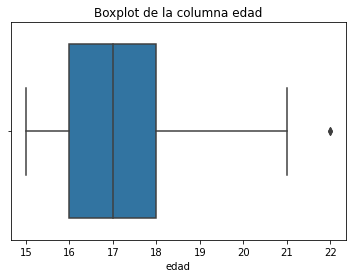

-------------------------------------------
outliers numero_ausencias_escolares :
54
------------------------------------------
Caracteristica : numero_ausencias_escolares
Limite Superior: 15.0
Limite Inferior: 0
Valor Máximo   : 75
Valor Mínimo   : 0
Valor Mediana  : 2.0
Valor Media    : 4.43
Valor STD      : 6.21


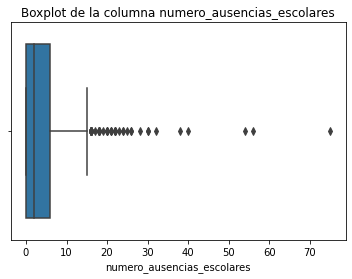

-------------------------------------------
outliers G1 :
1
------------------------------------------
Caracteristica : G1
Limite Superior: 19
Limite Inferior: 3.0
Valor Máximo   : 19
Valor Mínimo   : 0
Valor Mediana  : 11.0
Valor Media    : 11.21
Valor STD      : 2.98


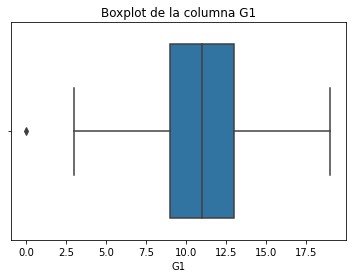

-------------------------------------------
outliers G2 :
20
------------------------------------------
Caracteristica : G2
Limite Superior: 19
Limite Inferior: 3.0
Valor Máximo   : 19
Valor Mínimo   : 0
Valor Mediana  : 11.0
Valor Media    : 11.25
Valor STD      : 3.28


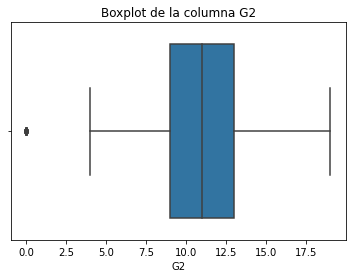

-------------------------------------------
outliers G3 :
54
------------------------------------------
Caracteristica : G3
Limite Superior: 20
Limite Inferior: 4.0
Valor Máximo   : 20
Valor Mínimo   : 0
Valor Mediana  : 11.0
Valor Media    : 11.34
Valor STD      : 3.86


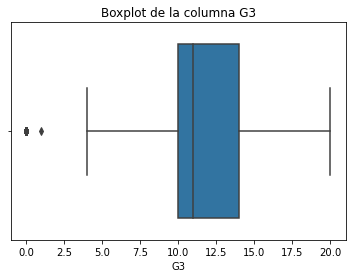

-------------------------------------------


In [62]:
# Identificamos outliers
list_features = [df.edad, 
                 df.numero_ausencias_escolares, df.G1, df.G2, df.G3]
lista_columnas = ['edad', 
                  'numero_ausencias_escolares',
                  'G1',
                  'G2',
                  'G3']
j=0
for i in list_features:
    q1_ps = np.percentile(i,25)
    q3_ps = np.percentile(i,75)
    iqr_ps = q3_ps - q1_ps
    iqr_ps_superior = q3_ps + 1.5 * iqr_ps
    iqr_ps_inferior = q1_ps - 1.5 * iqr_ps
    minimo = np.round(np.min(i), 2)
    maximo = np.round(np.max(i), 2)
    if iqr_ps_inferior <= minimo:
        iqr_ps_inferior= minimo

    if iqr_ps_superior >= maximo:
        iqr_ps_superior = maximo
    
    if iqr_ps_superior < maximo:
        print("outliers", lista_columnas[j],":")
    
    if iqr_ps_inferior > minimo:
        print("outliers", lista_columnas[j],":") 
    
    cantidad = ((i < iqr_ps_inferior) | (i > iqr_ps_superior)).sum()
    print(cantidad)
    
    print("------------------------------------------")
    print("Caracteristica :",lista_columnas[j])
    print("Limite Superior:", iqr_ps_superior.round(2))
    print("Limite Inferior:", iqr_ps_inferior.round(2))
    print("Valor Máximo   :", maximo)
    print("Valor Mínimo   :", minimo)
    print("Valor Mediana  :", np.round(np.median(i), 2))
    print("Valor Media    :", np.round(np.mean(i), 2))
    print("Valor STD      :", np.round(np.std(i), 2))
    plt.title('Boxplot de la columna ' + lista_columnas[j])
    sns.boxplot(i).set(xlabel=lista_columnas[j])
    plt.show()
    j = j +1
    print("-------------------------------------------")

<h1 style="color:rgb(255,0,0)" align='left'><b>3. EXPLORACIÓN DATOS</b></h1>

**A. EVALUACIÓN DE VARIABLES INDIVIDUAL**

Para nuestra exploración de los datos, vamos a evaluar las variables obtenidas en los cuestionarios realizados a los estudiantes. La evaluación se realiza en cada característica y el objetivo es obtener un análisis de los datos que nos permita identificar factores que inciden en las notas de los estudiantes. La exploración la realizaremos en cuatro aspectos:

+ Aspectos demográficos
+ Aspectos sociales / emocionales
+ Aspectos relacionados con la escuela
+ Aspectos relacionados con las notas
+ Evaluación por materias

Vamos a programar una función para realizar una grafica que contenga los datos. 

In [27]:
# Función para graficar y que incluye los datos en porcentaje.
def grafica_barras(total:len(df), dato, x_label):
    fig = plt.subplots(figsize=(10, 5))
    ax = sns.countplot(x=dato)
    for p in ax.patches:
        porcentaje = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()+0.05
        ax.annotate(porcentaje, (x, y), ha='center', va='center')
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.show()    

Para una mejor comprensión de los datos , vamos a realizar modificaciones en los datos.

In [28]:
# Mascara para los datos de genero
mask_genero = {'F':'Femenino','M':'Masculino'}
# Mascara para los datos de tipo de población
mask_poblacion = {'U':'Urbano', 'R':'Rural'}
# Mascara para los datos de la familia
mask_familia = {'LE3':'Menor_o_igual_3', 'GT3':'Mayor_de_3'}
# Mascara para los datos de la educación del padre y madre
mask_educacion = {'0':'Ninguna', '1':'4to', '2':'9no', '3':'Secundaria', '4':'Superior'}
# Mascara para los datos del trabajo del padre y madre
mask_trabajo = {'teacher':'Maestro', 'health':'Salud','services':'Servicios','at_home':'Trabajo_en_Casa', 'other':'Otros'}
# Mascara para los datos de Convivenvia Padres
mask_convivencia = {'T':'Viviendo_Juntos','A':'Separados'}
# Mascara para  los datos del tutor del estudiante
mask_tutor = {'mother':'Madre', 'father':'Padre', 'other':'Otro'}
# Mascara para los datos de Convivenvia Padres
mask_eleccion = {'course':'Preferencia','Other':'Otros','home':'Cerca_casa','reputation':'Reputacion'}
# Mascara para los datos del tiempo de viaje
mask_t_viaje = {'1':'<15min', '2':'15-30min', '3':'30-60min', '4':'>60min'}
# Mascara para los datos del tiempo de estudio
mask_t_estudio = {'1':'<2hrs', '2':'2-5hrs', '3':'5-10hrs', '4':'>10hrs'}
# Mascara para los datos relacion familiar, estado de salud
mask_rel = {'1':'muy_mala', '2':'mala', '3':'regular', '4':'buena','5':'excelente'}
# Mascara para tiempo libre despues de la escuela, salir con amigos, consumo alcohol
mask_act = {'1':'muy_bajo', '2':'bajo', '3':'a_veces', '4':'alto','5':'muy_alto'}

In [29]:
# Modificamos los datos de genero
df['genero'] = df['genero'].map(mask_genero)
# Modificamos los datos de tipo de población
df['tipo_poblacion'] = df['tipo_poblacion'].map(mask_poblacion)
# Modificamos los datos de la familia
df['tamano_familia'] = df['tamano_familia'].map(mask_familia)
# Modificamos los datos de la educación del padre y madre
df['educacion_madre'] = df['educacion_madre'].map(mask_educacion)
df['educacion_padre'] = df['educacion_padre'].map(mask_educacion)
# Modificamos los datos del trabajo del padre y madre
df['trabajo_madre'] = df['trabajo_madre'].map(mask_trabajo)
df['trabajo_padre'] = df['trabajo_padre'].map(mask_trabajo)
# Modificamos los datos de Convivenvia Padres
df['estado_convivencia_padres'] = df['estado_convivencia_padres'].map(mask_convivencia)
# Modificamos los datos del tutor del estudiante
df['tutor_estudiante'] = df['tutor_estudiante'].map(mask_tutor)
# Modificamos los datos de Convivenvia Padres
df['eleccion_escuela'] = df['eleccion_escuela'].map(mask_eleccion)
# Modificamos los datos del tiempo de viaje
df['tiempo_viaje'] = df['tiempo_viaje'].map(mask_t_viaje)
# Modificamos los datos del tiempo de estudio
df['tiempo_estudio'] = df['tiempo_estudio'].map(mask_t_estudio)
# Modificamos los datos de relacion familiar
df['relacion_familiar'] = df['relacion_familiar'].map(mask_rel)
# Modificamos los datos de tiempo_libre despues de la escuela
df['tiempo_libre_despues_escuela'] = df['tiempo_libre_despues_escuela'].map(mask_act)
# Modificamos los datos de salir con amigos
df['salir_con_amigos'] = df['salir_con_amigos'].map(mask_act)
# Modificamos los datos de consumo de alcohol en jornada_laboral (En la semana)
df['consumo_alcohol_jornada_laboral'] = df['consumo_alcohol_jornada_laboral'].map(mask_act)
# Modificamos los datos de consumo alcohol el fin de semana
df['consumo_alcohol_fin_semana'] = df['consumo_alcohol_fin_semana'].map(mask_act)
# Modificamos los datos de estado salud actual
df['estado_salud_actual'] = df['estado_salud_actual'].map(mask_rel)

### **Aspectos demográficos**

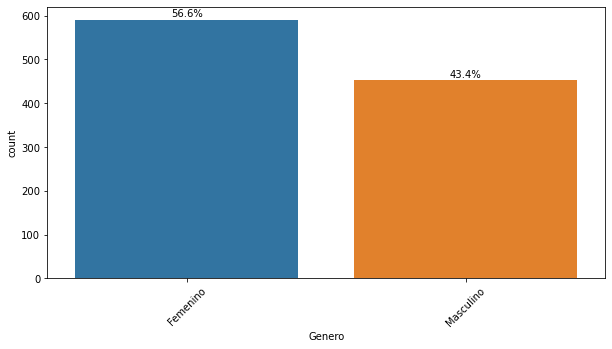

--------------------------------------------------------------------------------


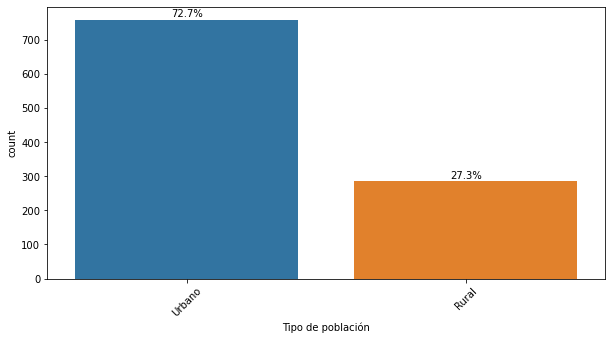

--------------------------------------------------------------------------------


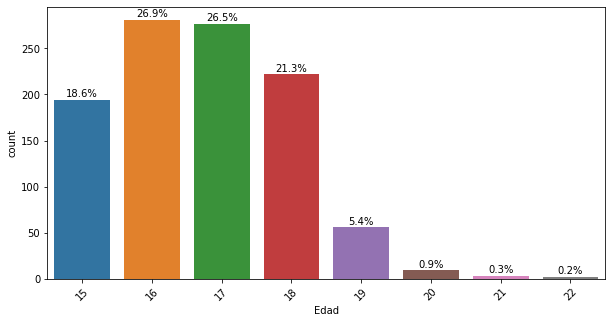

--------------------------------------------------------------------------------


In [30]:
grafica_barras(total, df['genero'], "Genero",)
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['tipo_poblacion'], "Tipo de población")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['edad'], "Edad")
print("--------------------------------------------------------------------------------")

De los 1044 registros obtenidos 591 (56.6%) corresponden a género femenino. Y del total de los participantes el 72.7% viven en la zona urbana, mostrando con esto que nuestros resultados estarán afectados por este tipo de población. En cuanto a las edades el 53.4% de los datos corresponden a las edades entre 16 y 17 años y el 6.8% en edades de 19 hasta 22 años. Donde estos últimos incidirían en los datos outliers de la característica de edad.

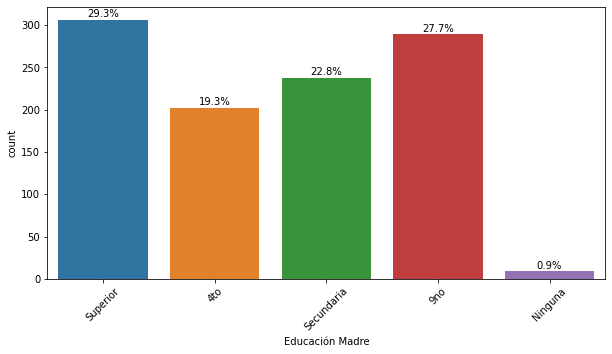

--------------------------------------------------------------------------------


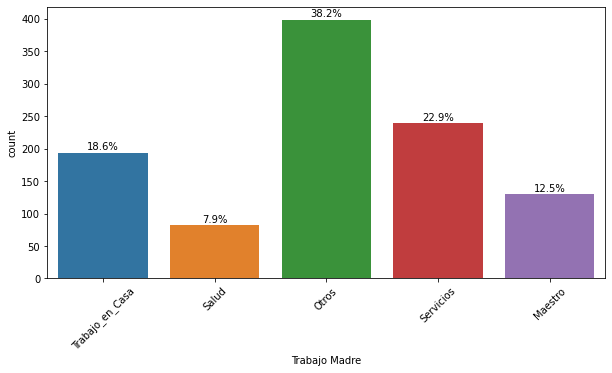

--------------------------------------------------------------------------------


In [31]:
grafica_barras(total, df['educacion_madre'], "Educación Madre")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['trabajo_madre'], "Trabajo Madre")
print("--------------------------------------------------------------------------------")

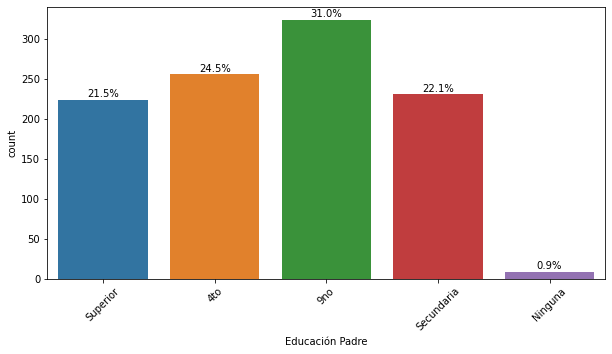

--------------------------------------------------------------------------------


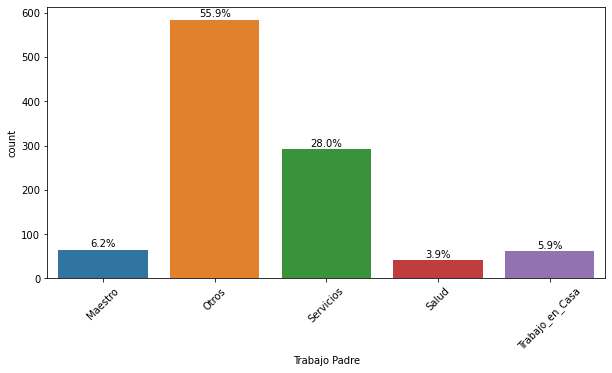

--------------------------------------------------------------------------------


In [32]:
grafica_barras(total, df['educacion_padre'], "Educación Padre")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['trabajo_padre'], "Trabajo Padre")
print("--------------------------------------------------------------------------------")

La tercera parte de las madres tienen una educación superior y superan en 8 puntos a la educación superior que tienen los padres. En cuanto a los padres los de mayor representación tienen educación hasta noveno grado. Con ninguna o hasta el 4to grado de educación ambos padres representan prácticamente el mismo porcentaje (30.2% -Madres, 30.5%-Padres).
En cuanto al trabajo en ambos padres el mayor porcentaje están en labores de otras actividades (38.2%-Madres, 55.9%-Padres), pero se observa algo interesante, el 18.6% de las madres trabajan en casa, mientras los padres sólo representan el 5.9%.

### **Aspectos sociales / emocionales**

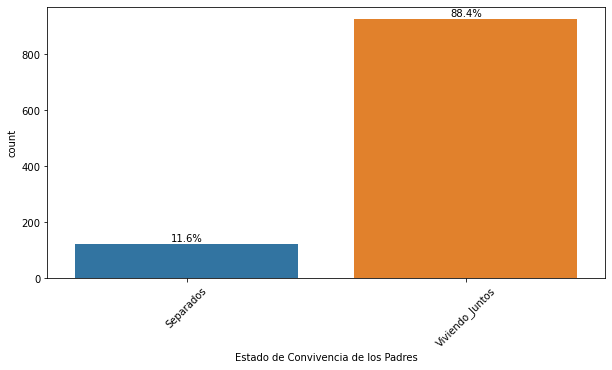

--------------------------------------------------------------------------------


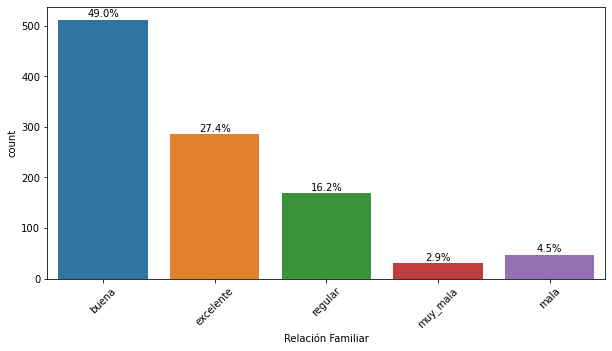

--------------------------------------------------------------------------------


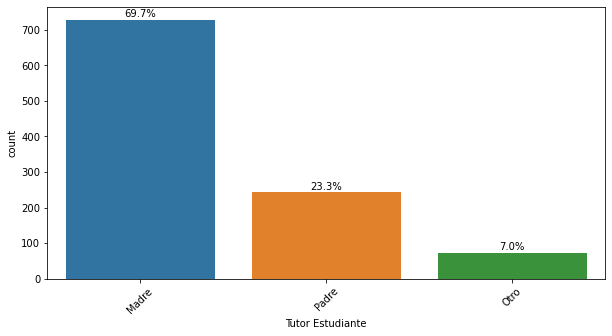

--------------------------------------------------------------------------------


In [33]:
grafica_barras(total, df['estado_convivencia_padres'], "Estado de Convivencia de los Padres")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['relacion_familiar'], "Relación Familiar")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['tutor_estudiante'], "Tutor Estudiante")
print("--------------------------------------------------------------------------------")

En cuanto al entorno familiar del estudiante, el 88.4% de los padres conviven juntos, la relación con ellos la mayoría de los estudiantes argumentan que es buena hasta excelente (89.6%) y la responsabilidad y acompañamiento del estudiante la tutoría la asume en mayor porcentaje las madres 69.7%)

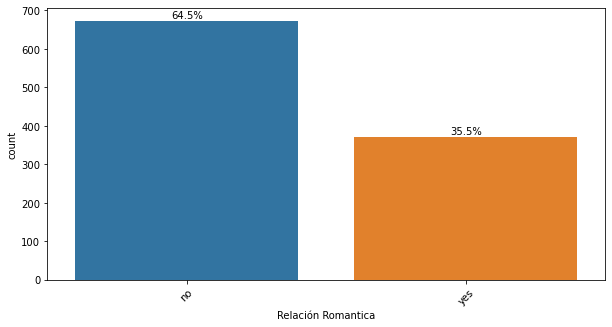

--------------------------------------------------------------------------------


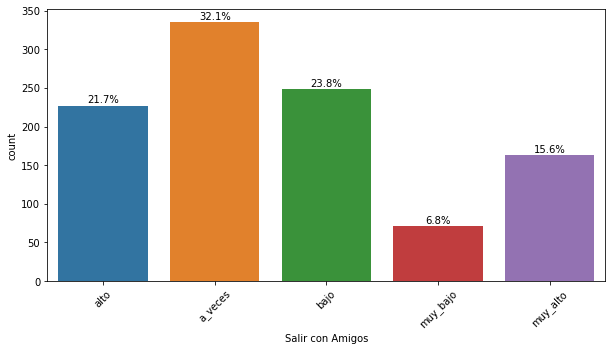

--------------------------------------------------------------------------------


In [34]:
grafica_barras(total, df['relacion_romantica'], "Relación Romantica")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['salir_con_amigos'], "Salir con Amigos")
print("--------------------------------------------------------------------------------")

En cuanto al entorno social sólo el 35.5% de los estudiante afirmar tener una relación romántica y en cuanto a compartir con los amigos la mayoría socializan con ellos(69.4%).

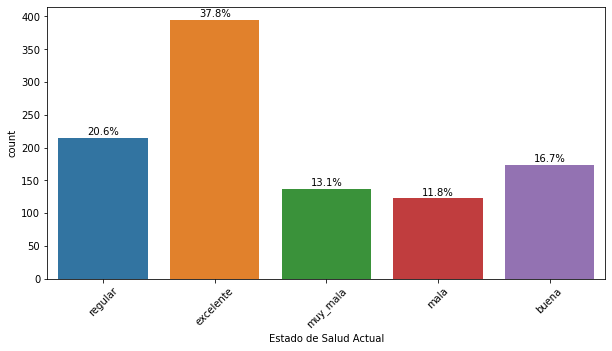

--------------------------------------------------------------------------------


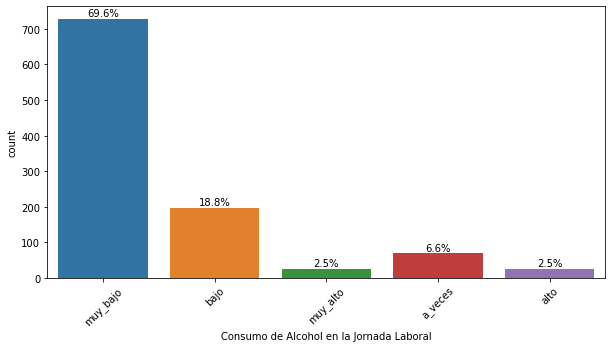

--------------------------------------------------------------------------------


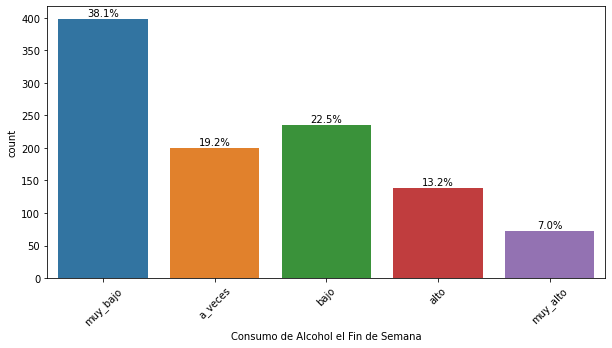

--------------------------------------------------------------------------------


In [35]:
grafica_barras(total, df['estado_salud_actual'], "Estado de Salud Actual")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['consumo_alcohol_jornada_laboral'], "Consumo de Alcohol en la Jornada Laboral")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['consumo_alcohol_fin_semana'], "Consumo de Alcohol el Fin de Semana")
print("--------------------------------------------------------------------------------")

El 75.1% de los estudiantes manifiestan que gozan de buena hasta excelente salud. En cuanto al consumo de alcohol durante la semana (Jornada laboral) el 5% consumen alcohol  y en los fines de semana el 20.2% de los estudianes.

### **Aspectos relacionados con la escuela**

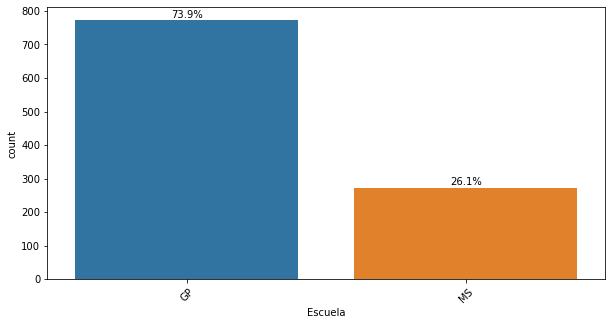

--------------------------------------------------------------------------------


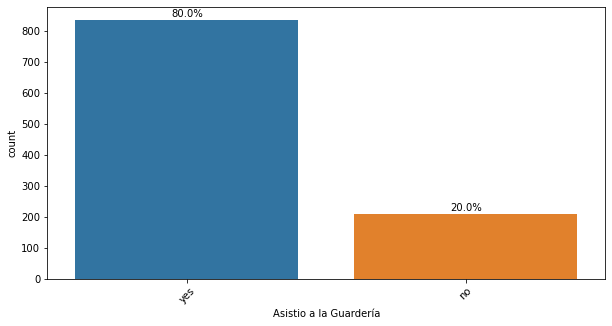

--------------------------------------------------------------------------------


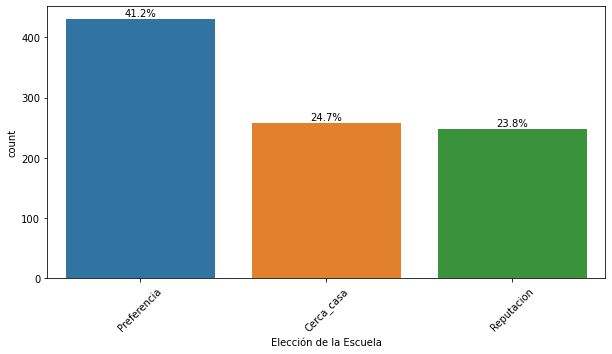

--------------------------------------------------------------------------------


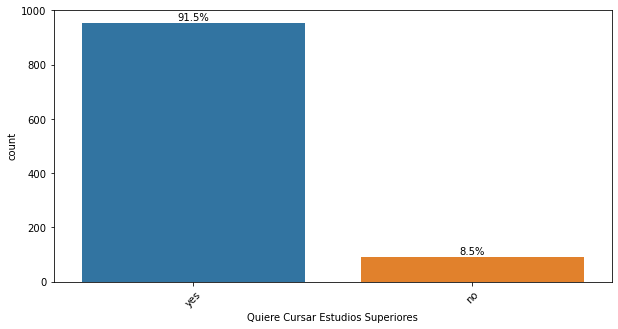

--------------------------------------------------------------------------------


In [36]:
grafica_barras(total, df['escuela'], "Escuela")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['asistio_guarderia'], "Asistio a la Guardería")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['eleccion_escuela'], "Elección de la Escuela")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['quiere_cursar_estudios_superiores'], "Quiere Cursar Estudios Superiores")
print("--------------------------------------------------------------------------------")

El 73.9% de los estudiantes encuestados corresponden a la escuela GP y el resto a MS. El 80% de los estudiantes asistieron a la guardería, la decisión de la escuela fue por preferencia y la mayoría de los estudiantes su proyecto de vida está en cursar estudios superiores(91.5%).

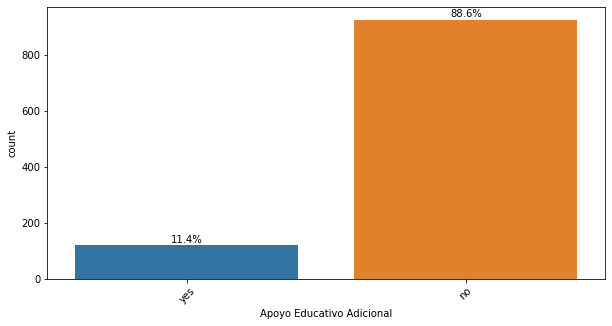

--------------------------------------------------------------------------------


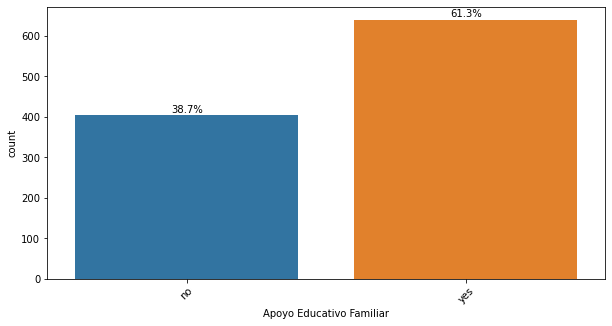

--------------------------------------------------------------------------------


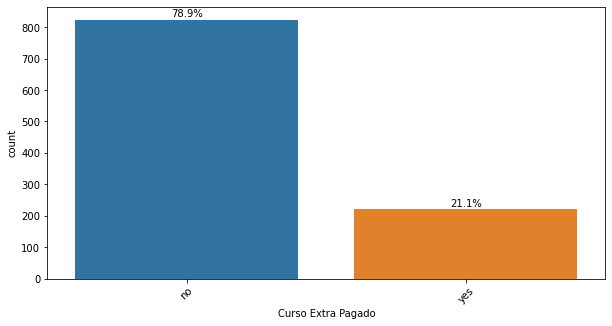

--------------------------------------------------------------------------------


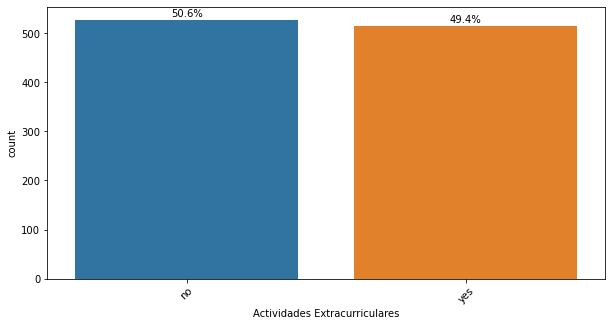

--------------------------------------------------------------------------------


In [37]:
grafica_barras(total, df['apoyo_educativo_adicional'], "Apoyo Educativo Adicional")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['apoyo_educativo_familiar'], "Apoyo Educativo Familiar")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['curso_extra_pagado'], "Curso Extra Pagado")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['actividades_extracurriculares'], "Actividades Extracurriculares")
print("--------------------------------------------------------------------------------")

En cuanto al apoyo en la formación académica del estudiante , la mayoría de los estudiantes son apoyados con recursos  familiares(61.3%), muy pocos reciben apoyo extra (21.1%), y en cuanto a las actividades extracurriculares están muy equivalentes en sus porcentajes.

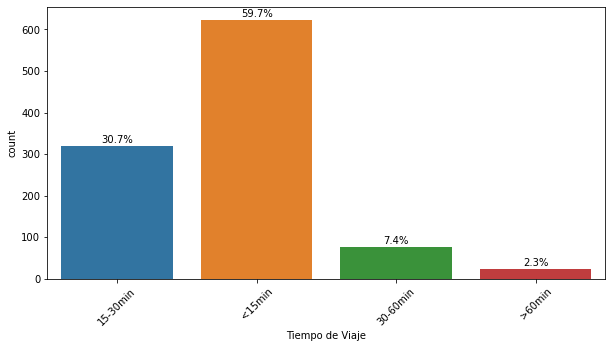

--------------------------------------------------------------------------------


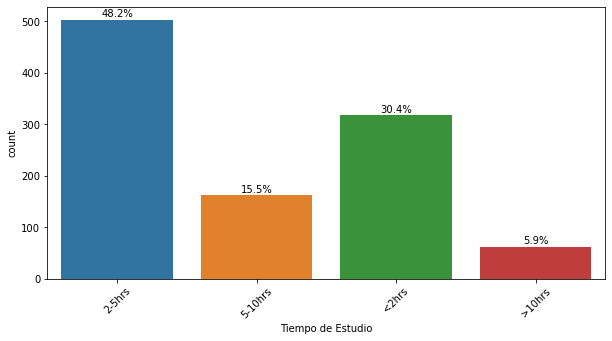

--------------------------------------------------------------------------------


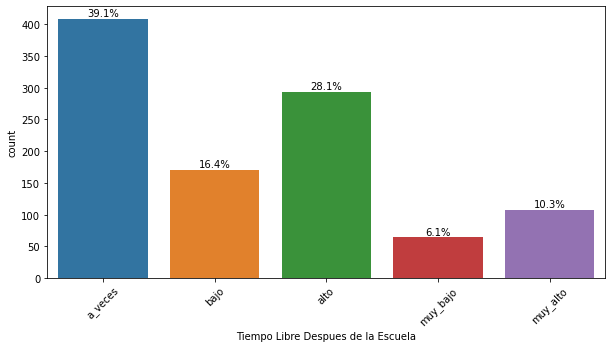

--------------------------------------------------------------------------------


In [38]:
grafica_barras(total, df['tiempo_viaje'], "Tiempo de Viaje")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['tiempo_estudio'], "Tiempo de Estudio")
print("--------------------------------------------------------------------------------")
grafica_barras(total, df['tiempo_libre_despues_escuela'], "Tiempo Libre Despues de la Escuela")
print("--------------------------------------------------------------------------------")

En cuanto al tiempo del estudiante, el desplazamiento para la escuela la mayoría de ellos viven cerca (90.4%) con un tiempo de desplazamiento entre 15-30 minutos. En el tiempo de dedicación a estudiar la mayoría de ellos invierten entre 2-5 horas (48.2%). Y del tiempo libre después de la escuela el 77.5% tiene algo o mucho de este tiempo.

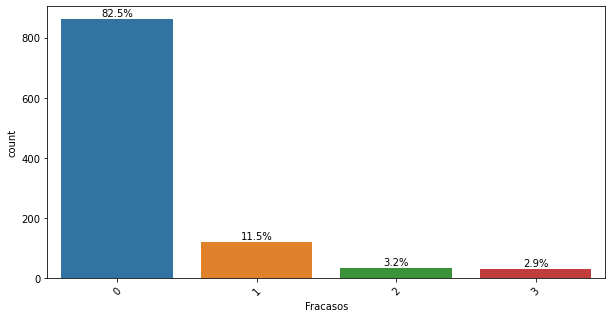

--------------------------------------------------------------------------------


In [39]:
grafica_barras(total, df['fracasos'], "Fracasos")
print("--------------------------------------------------------------------------------")

El 11.5% han tenido minimo un fracaso en los cursos y el 6.1% entre 2 y tres fracasos del curso.

### **Aspectos relacionados con las Notas**

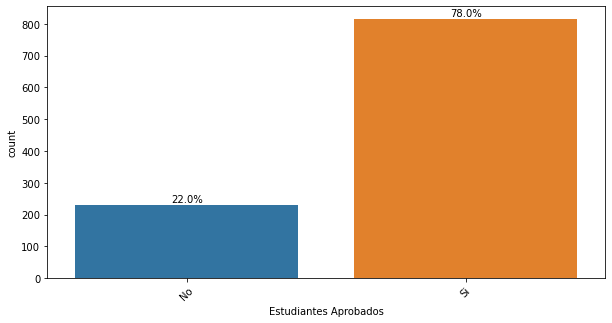

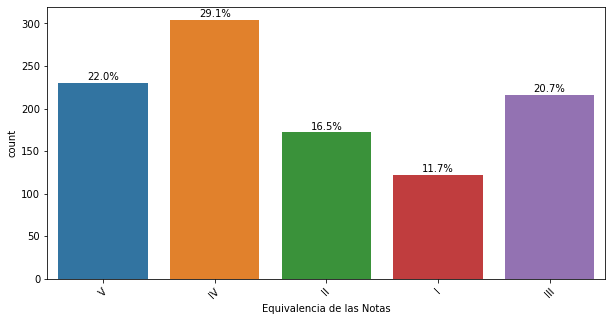

In [40]:
grafica_barras(total, df['aprobado'], "Estudiantes Aprobados")
grafica_barras(total, df['equivalencia'], "Equivalencia de las Notas")

El 22% de los estudiantes desaprueban los cursos, de acuerdo con el formato de calificación de la Eurostat, el estudiante falló(fail). Pero se observa también que un porcentaje alto (29.1%) logran obtener la nota mínima que requiere para pasar el curso (sufficient), en cuanto a estudiantes sobresalientes el 28.2 (good-excellent) están entre buenos y excelentes. 

**A. EVALUACIÓN DE VARIABLES CON LA VARIABLE TARGET**

In [41]:
# Cuales estudiantes tiene el potencial de perder la materia
diccionario = {'No':1, 'Si':0}
binario = df['aprobado'].map(diccionario)
df['y_bin']=binario              

In [42]:
def graficar_noaprobados(variablePredictora, variablePredecir, type='line',**kwargs):
    x = variablePredictora
    y = variablePredecir
    
    datos = df.groupby(x)[y].mean().mul(100).rename('porcentaje_noaprobados').reset_index()
    print("----------------------")
    print(" % de No Aprobados")             
    print(datos.round(2))
    print("----------------------")
    
    plt.figure(figsize=(14, 6))
    sns.barplot(x=variablePredictora, y='porcentaje_noaprobados', data=datos, order=orden)
    plt.grid()     

----------------------
 % de No Aprobados
   edad  porcentaje_noaprobados
0    15                   17.01
1    16                   17.44
2    17                   21.66
3    18                   27.48
4    19                   41.07
5    20                   11.11
6    21                   33.33
7    22                  100.00
----------------------


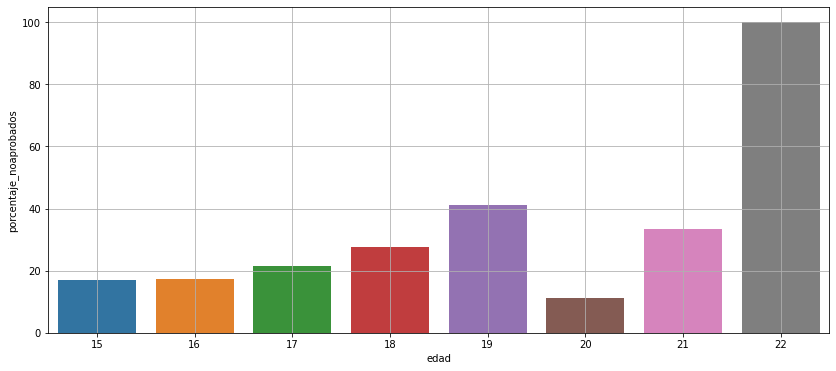

In [43]:
orden = [15, 16, 17, 18, 19, 20, 21, 22]
graficar_noaprobados('edad','y_bin', type='bar')

----------------------
 % de No Aprobados
      genero  porcentaje_noaprobados
0   Femenino                   21.15
1  Masculino                   23.18
----------------------


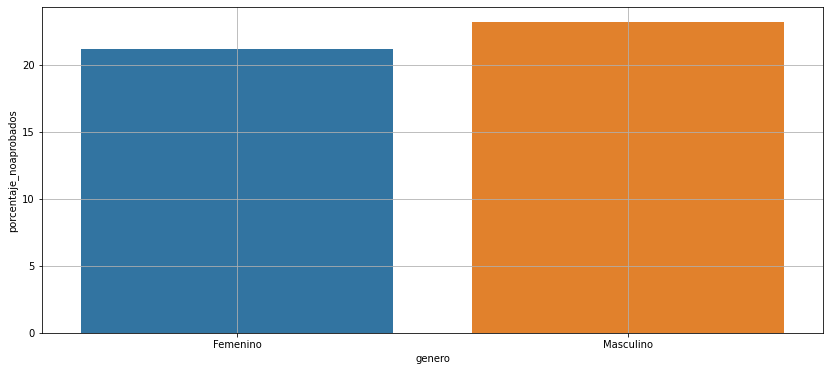

In [44]:
orden = ['Femenino', 'Masculino']
graficar_noaprobados('genero','y_bin', type='bar')

----------------------
 % de No Aprobados
  tiempo_estudio  porcentaje_noaprobados
0         2-5hrs                   22.07
1        5-10hrs                   14.20
2          <2hrs                   27.44
3         >10hrs                   14.52
----------------------


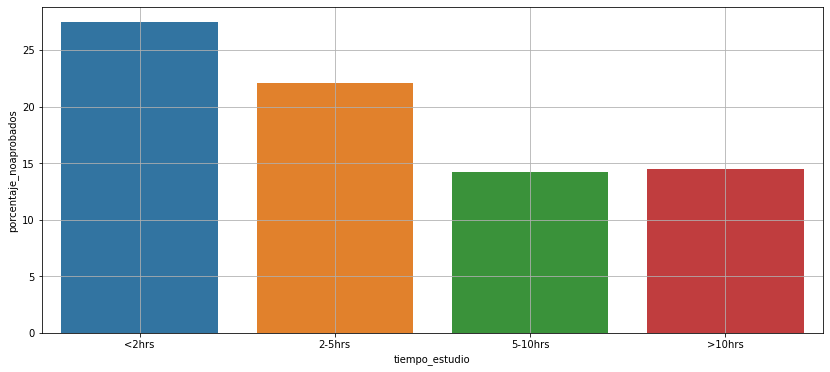

In [45]:
orden = ['<2hrs', '2-5hrs', '5-10hrs', '>10hrs']
graficar_noaprobados('tiempo_estudio','y_bin', type='bar')

----------------------
 % de No Aprobados
  tipo_poblacion  porcentaje_noaprobados
0          Rural                   27.02
1         Urbano                   20.16
----------------------


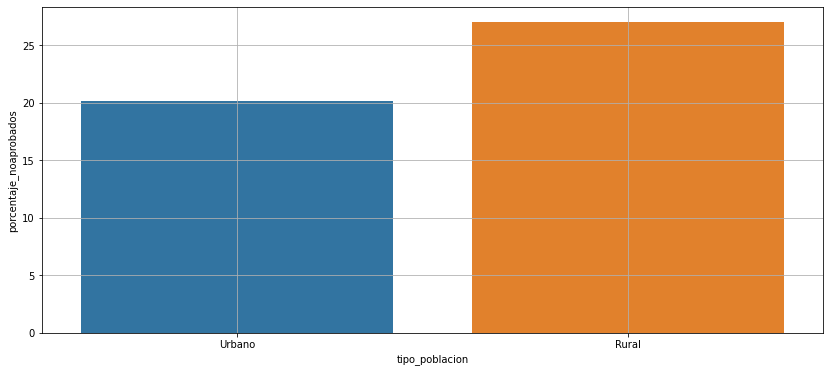

In [46]:
orden = ['Urbano', 'Rural']
graficar_noaprobados('tipo_poblacion','y_bin', type='bar')

----------------------
 % de No Aprobados
    tamano_familia  porcentaje_noaprobados
0       Mayor_de_3                   23.31
1  Menor_o_igual_3                   18.95
----------------------


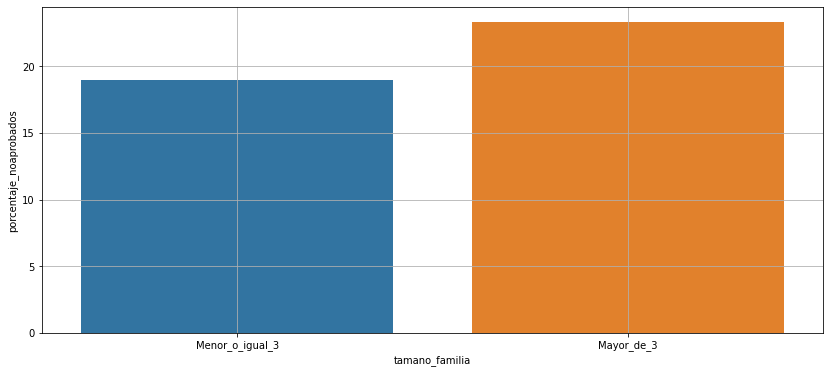

In [47]:
orden = ['Menor_o_igual_3', 'Mayor_de_3']
graficar_noaprobados('tamano_familia','y_bin', type='bar')

----------------------
 % de No Aprobados
  estado_convivencia_padres  porcentaje_noaprobados
0                 Separados                   19.01
1           Viviendo_Juntos                   22.43
----------------------


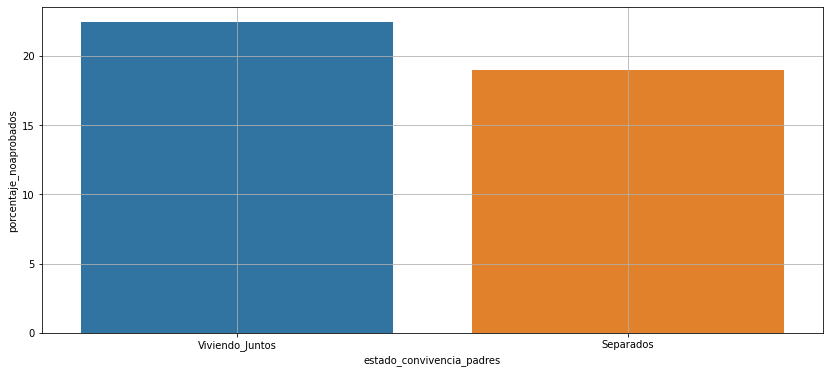

In [48]:
orden = ['Viviendo_Juntos', 'Separados']
graficar_noaprobados('estado_convivencia_padres','y_bin', type='bar')

----------------------
 % de No Aprobados
  quiere_cursar_estudios_superiores  porcentaje_noaprobados
0                                no                   51.69
1                               yes                   19.27
----------------------


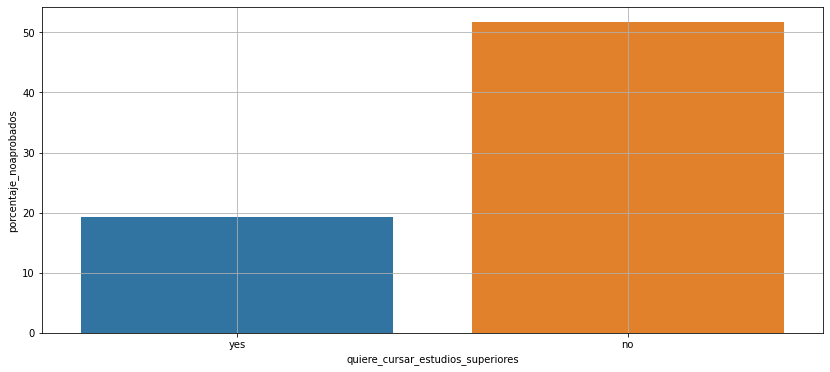

In [49]:
orden = ['yes', 'no']
graficar_noaprobados('quiere_cursar_estudios_superiores','y_bin', type='bar')

----------------------
 % de No Aprobados
  tutor_estudiante  porcentaje_noaprobados
0            Madre                   22.53
1             Otro                   34.25
2            Padre                   16.87
----------------------


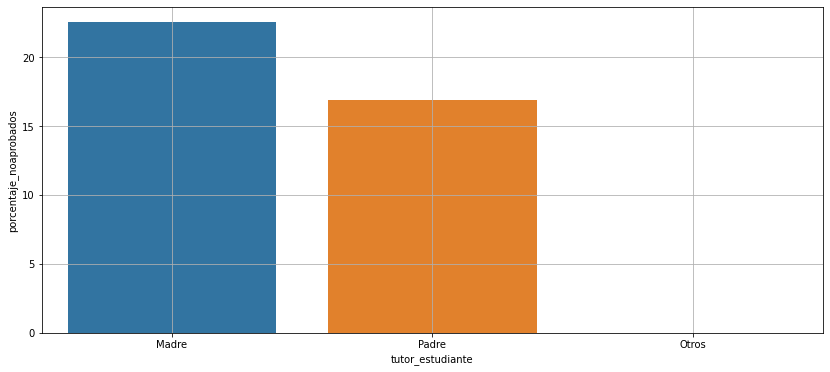

In [50]:
orden = ['Madre', 'Padre','Otros']
graficar_noaprobados('tutor_estudiante','y_bin', type='bar')

----------------------
 % de No Aprobados
  relacion_familiar  porcentaje_noaprobados
0             buena                   19.14
1         excelente                   23.43
2              mala                   25.53
3          muy_mala                   36.67
4           regular                   24.85
----------------------


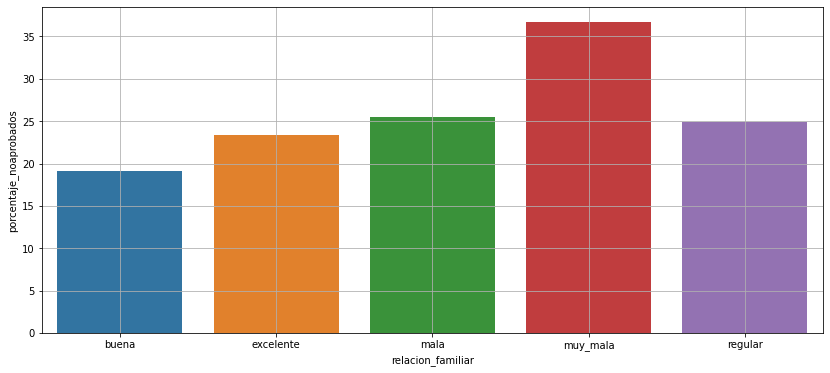

In [51]:
orden = ['buena', 'excelente', 'mala', 'muy_mala', 'regular']
graficar_noaprobados('relacion_familiar','y_bin', type='bar')

----------------------
 % de No Aprobados
  relacion_romantica  porcentaje_noaprobados
0                 no                   19.61
1                yes                   26.42
----------------------


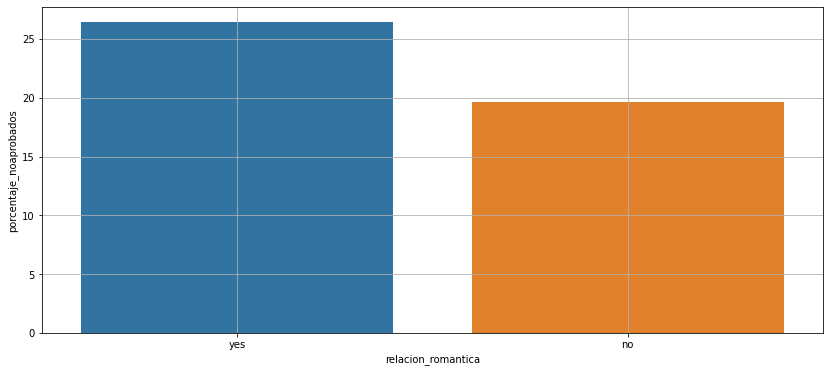

In [52]:
orden = ['yes', 'no']
graficar_noaprobados('relacion_romantica','y_bin', type='bar')

----------------------
 % de No Aprobados
  tiempo_viaje  porcentaje_noaprobados
0     15-30min                   22.81
1     30-60min                   25.97
2       <15min                   21.03
3       >60min                   25.00
----------------------


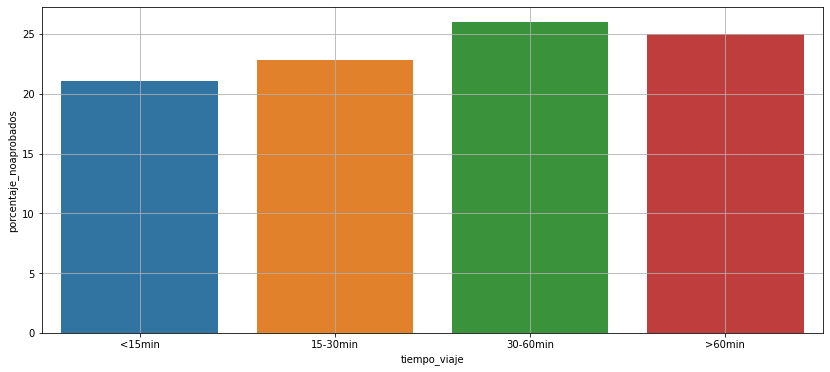

In [53]:
orden = ['<15min', '15-30min','30-60min','>60min']
graficar_noaprobados('tiempo_viaje','y_bin', type='bar')

### **Evaluación por materias**

In [54]:
print(round(df.groupby(['materia', 'aprobado']).aprobado.count()/len(df)*100,1))

materia  aprobado
M        No          12.5
         Si          25.4
P        No           9.6
         Si          52.6
Name: aprobado, dtype: float64


El 22% de los estudiantes desaprueban las materias de portugués y matemática. Pero realizando una evaluación en cada nivel de calificación encontramos que sólo el 28% son estudiantes sobresalientes y satisfactoriamente el 21% y el resto son estudiantes con bajo nivel de rendimiento.
En cuanto a las materias el 38% son estudiantes de matemáticas y de estos el 33% no aprueban. En la materia de portugués son la mayoría de los estudiantes evaluados y de estos el 15% no aprueban. Esto nos indica que la materia de mayor exigencia y donde los estudiantes presentan dificultades de aprobar son las matemáticas.

In [55]:
df.groupby(['materia', 'escuela', 'aprobado']).aprobado.count()

materia  escuela  aprobado
M        GP       No          113
                  Si          236
         MS       No           17
                  Si           29
P        GP       No           32
                  Si          391
         MS       No           68
                  Si          158
Name: aprobado, dtype: int64

In [56]:
df.groupby(['materia', 'genero']).genero.count()

materia  genero   
M        Femenino     208
         Masculino    187
P        Femenino     383
         Masculino    266
Name: genero, dtype: int64

De los 395 estudiantes de matemáticas el 88% son de la escuela GP-Gabriel Pereira y los estudiantes de lengua portuguesa el 65% son de esta misma escuela. Las matemáticas en la escuela GP aprueban el 68% y en la otra escuela aprueban el 63%. En cuanto a la lengua portuguesa en la escuela GP aprueban el 92% ,  en la otra escuela aprueban el 57%.

In [63]:
porMG1 = np.round(data_por['G1'].mean(), 2)
porMG2 = np.round(data_por['G2'].mean(), 2)
porMG3 = np.round(data_por['G3'].mean(), 2)
matMG1 = np.round(data_math['G1'].mean(), 2)
matMG2 = np.round(data_math['G2'].mean(), 2)
matMG3 = np.round(data_math['G3'].mean(), 2)
print("Periodo        Leng. Portuguesa  Matemáticas")
print("G1 :              ", porMG1,"          ",matMG1)
print("G2:               ", porMG2,"         ",matMG2)
print("G3:               ", porMG3,"         ",matMG3)
print("PRM Total:        ", np.round((porMG1+ porMG2+porMG3)/3,2),"         ",np.round((matMG1+matMG2+matMG3)/3,2))

Periodo        Leng. Portuguesa  Matemáticas
G1 :               11.4            10.91
G2:                11.57           10.71
G3:                11.91           10.42
PRM Total:         11.63           10.68


In [ ]:
df.columns

## CORRELACIÓN

In [64]:
# Seleccionar la variables numericas para calcular la matriz de correlacción
var_numericas = df.select_dtypes(include=['float64','int64'])
matriz_correlacion = var_numericas.corr()

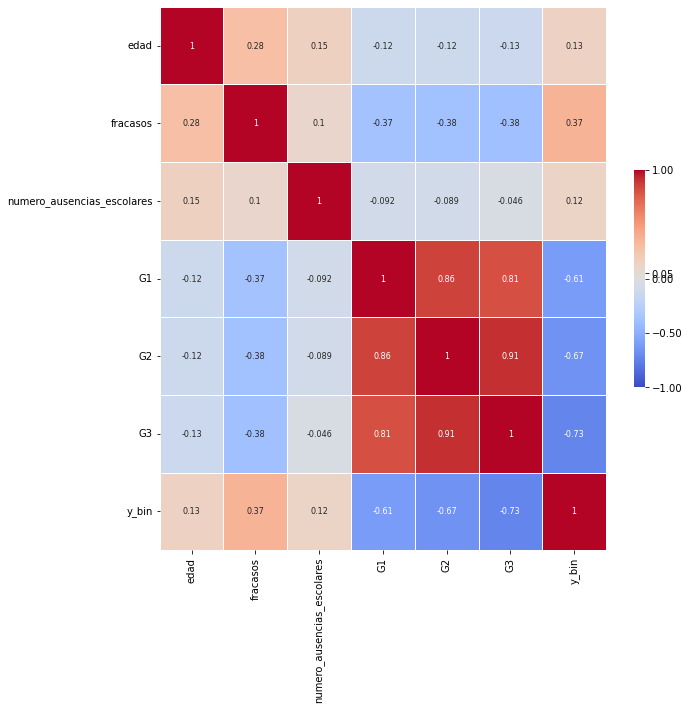

In [65]:
# Graficamos la correlación entre las variables

mask_cor = np.zeros_like(matriz_correlacion, dtype=np.bool)
mask_cor[np.triu_indices_from(mask_cor)] == True

f, ax = plt.subplots(figsize=(10,10))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask_cor,
                      linewidths = 0.5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink':.4,
                                 'ticks': [-1, -0.5, 0, 0.05,1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws={'fontsize':8})
ax.set_yticklabels(matriz_correlacion.columns,
                   rotation = 0)

ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True},
              {'ytick.left': True})         

## Analisis de distribucción , Scatterplot y correlacción

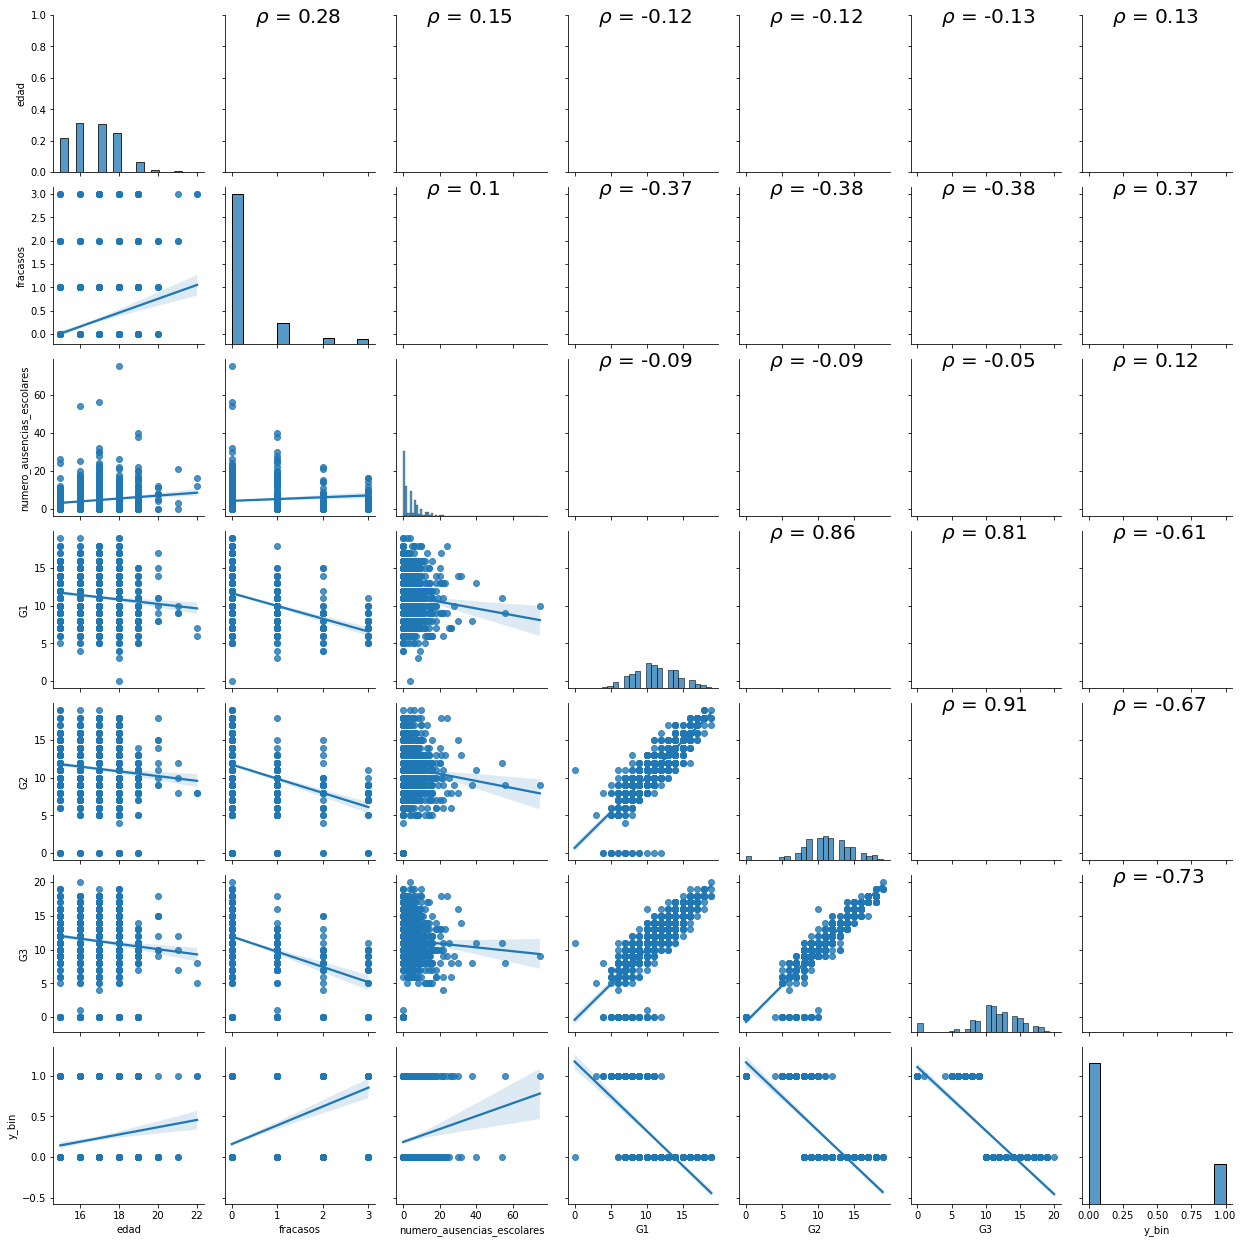

In [66]:
def corre(x, y, **kwargs):
    
    # Calcular el valor de la correlación
    coef = np.corrcoef(x, y)[0][1]
    # Generamos la etiqueta
    etiqueta = r'$\rho$ = ' + str(round(coef, 2))
    # Agregamos la etiqueta al grafico
    ax = plt.gca()
    ax.annotate(etiqueta,
                xy = (0.2, 0.95),
                size = 20,
                xycoords = ax.transAxes)
    
# Generamos la grilla para colocar los graficos
g = sns.PairGrid(var_numericas)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(corre)    

Evaluada las gráficas de correlación y el análisis exploratorio, consideramos que hay variables categóricas y numéricas que nos pueden supeditar el modelo como: La escuela, la materia, el género, G1 y G2. Para evitar esto vamos a eliminar estas variables.

<h1 style="color:rgb(255,0,0)" align='left'><b>4. DESARROLLO DEL MODELO</b></h1>

Continuamos con la preparación de la Base de datos , para ellos aplicaremos dummies a la características categóricas y eliminamos las que fueron modificadas.

In [67]:
# Función para convertir las variables categoricas a dummies
def convertir_dummies(dataset, columnas):
    df_base = dataset
    for col in columnas:
        cv_dummies = pd.get_dummies(df_base[col], prefix=col, drop_first = True)
        df_base = pd.concat([df_base, cv_dummies], axis=1)
        df_base = df_base.drop([col], axis=1)
    return df_base   

In [68]:
columnas = ['escuela', 'genero', 'materia', 'tipo_poblacion', 'tamano_familia',
            'estado_convivencia_padres', 'educacion_madre', 'educacion_padre',
            'trabajo_madre', 'trabajo_padre', 'eleccion_escuela',
            'tutor_estudiante', 'tiempo_viaje', 'tiempo_estudio',
            'apoyo_educativo_adicional', 'apoyo_educativo_familiar',
            'curso_extra_pagado', 'actividades_extracurriculares',
            'asistio_guarderia', 'quiere_cursar_estudios_superiores', 
            'acceso_internet', 'relacion_romantica', 'relacion_familiar',
            'tiempo_libre_despues_escuela', 'salir_con_amigos',
            'consumo_alcohol_jornada_laboral', 'consumo_alcohol_fin_semana', 'estado_salud_actual']

df = convertir_dummies(df, columnas)
df.head(3)

,edad,fracasos,numero_ausencias_escolares,G1,G2,G3,equivalencia,aprobado,y_bin,escuela_MS,...,consumo_alcohol_jornada_laboral_muy_alto,consumo_alcohol_jornada_laboral_muy_bajo,consumo_alcohol_fin_semana_alto,consumo_alcohol_fin_semana_bajo,consumo_alcohol_fin_semana_muy_alto,consumo_alcohol_fin_semana_muy_bajo,estado_salud_actual_excelente,estado_salud_actual_mala,estado_salud_actual_muy_mala,estado_salud_actual_regular
0,18,0,6,5,6,6,V,No,1,0,...,0,1,0,0,0,1,0,0,0,1
1,17,0,4,5,5,6,V,No,1,0,...,0,1,0,0,0,1,0,0,0,1
2,15,3,10,7,8,10,IV,Si,0,0,...,0,0,0,0,0,0,0,0,0,1


## **1. Preperación de las Base de datos**

Para el desarrollo del presente proyecto se evaluaran 6 bases de datos, configuradas por tres variables target: G3 , Binario(Gano/Perdió - aprobado). Y a cada variable target se evaluará con datos completos (incluido las notas G1, G2, G3) y incompleto sin incluir las notas G1 y G2, G3. Ahora continuamos con la preparación de la Base de Datos.

In [69]:
# Variable Target G3 con G1 y G2
df_A = df.drop(['y_bin','equivalencia','aprobado'], axis =1)
# Variable Target G3 sin G1 y G2
df_B = df.drop(['y_bin','equivalencia', 'G1', 'G2', 'aprobado'], axis =1)
# Variable Target y_bin (Binaria) con G1 y G2
df_C = df.drop(['equivalencia','G3', 'aprobado'], axis =1)
# Variable Target y_bin (Binaria) sin G1 y G2
df_D = df.drop(['equivalencia','G1', 'G2', 'G3', 'aprobado'], axis =1)
# Variable Target y_5 niveles con G1 y G2
df_E = df.drop(['y_bin', 'G3', 'aprobado'], axis =1)
# Variable Target y_5 niveles sin G1 y G2
df_F = df.drop(['y_bin', 'G3', 'G1', 'G2', 'aprobado'], axis =1)

In [ ]:
df_A.head(3)

In [ ]:
df_B.head(3)

In [ ]:
df_C.head(3)

In [ ]:
df_D.head(3)

In [ ]:
df_E.head(3)

In [ ]:
df_F.head(3)

## **2. Librería para los modelos**

In [167]:
# Librerías para los modelos
# Preprocesamiento, metricas , selección, hiperparametros, cross validation, pipeline
from sklearn.preprocessing import binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc,
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline


# modelos de Regresion
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#Modelos de clasificacion
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## **3. Instanciamos los modelos**

In [73]:
# Modelos para regresión
sgd_r = SGDRegressor() # stochastic gradient descent (SGD) #okokok
gbr_r = GradientBoostingRegressor() # Regressión - Liam # okokok
raf_r = RandomForestRegressor(n_estimators=10) # Regressión -Laura # okok

models_r = [sgd_r,gbr_r,raf_r]

# Modelos para Clasificación
sgd_c = SGDClassifier() # stochastic gradient descent (SGD) 
gbr_c = GradientBoostingClassifier() # ok
raf_c = RandomForestClassifier() # okokok

models_c = [sgd_c,gbr_c,raf_c]

## **4. Definimos los rangos de los hiperparametros**

In [74]:
#SGD Regressor - # stochastic gradient descent (SGD) # ok
penalty = ['l2', 'l1', 'elasticnet']
alpha= [0.0001,0.001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [1,5,10,100,1000]
sgd_r_grid = dict(penalty=penalty,alpha=alpha,l1_ratio=l1_ratio, max_iter=max_iter)

# Gradiente Boosting Regressor # ok
criterion = ['friedman_mse', 'squared_error']
max_features =['auto', 'sqrt', 'log2']
gbr_r_grid = dict(max_features=max_features, criterion=criterion)


# Random Forest Regressor # ok
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
raf_r_grid = dict(n_estimators=n_estimators,max_features=max_features)

grids_reg =[sgd_r_grid, gbr_r_grid, raf_r_grid]


#SGD Classifiers - # stochastic gradient descent (SGD) # ok
penalty = ['l2', 'l1', 'elasticnet']
alpha= [0.0001,0.001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [1,5,10,100,1000]
sgd_c_grid = dict(penalty=penalty,alpha=alpha,l1_ratio=l1_ratio, max_iter=max_iter)

# Gradiente Boosting Classifiers # ok
criterion = ['friedman_mse', 'squared_error']
max_features =['auto', 'sqrt', 'log2']
gbr_c_grid = dict(max_features=max_features, criterion=criterion)

#Random Forest Classifiers # ok
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
raf_c_grid = dict(n_estimators=n_estimators, max_features=max_features)

grids_cla =[sgd_c_grid, gbr_c_grid, raf_c_grid]

## **5. Creación de Matrices de resultados para cada dataframe**

In [75]:
#Dataframe de resultados de regresion
cols_reg = ['Medicion', 'SGD_reg','RndForest_reg','GBR_reg']
resul_reg_BD_A = pd.DataFrame(columns=cols_reg)
resul_reg_BD_B = pd.DataFrame(columns=cols_reg)
resul_reg_BD_A.set_index('Medicion',inplace=True)
resul_reg_BD_B.set_index('Medicion',inplace=True)
resul_reg_BD_A.loc['Standard_reg_A'] = [0,0,0]
resul_reg_BD_B.loc['Standard_reg_B'] = [0,0,0]
resul_reg_BD_A.loc['GridSearch_reg_A'] = [0,0,0]
resul_reg_BD_B.loc['GridSearch_reg_B'] = [0,0,0]
resul_reg_BD_A.loc['RandomSearch_reg_A'] = [0,0,0]
resul_reg_BD_B.loc['RandomSearch_reg_B'] = [0,0,0]
#--------------------------------------------------------
#Dataframe de resultados de Clasificacion
cols_cla = ['Medicion', 'SGD_cla','RndForest_cla','GBR_cla']
resul_cla_BD_C = pd.DataFrame(columns=cols_cla)
resul_cla_BD_D = pd.DataFrame(columns=cols_cla)
resul_cla_BD_E = pd.DataFrame(columns=cols_cla)
resul_cla_BD_F = pd.DataFrame(columns=cols_cla)

resul_cla_BD_C.set_index('Medicion',inplace=True)
resul_cla_BD_D.set_index('Medicion',inplace=True)
resul_cla_BD_E.set_index('Medicion',inplace=True)
resul_cla_BD_F.set_index('Medicion',inplace=True)


resul_cla_BD_C.loc['Standard_cla_C'] = [0,0,0]
resul_cla_BD_D.loc['Standard_cla_D'] = [0,0,0]
resul_cla_BD_E.loc['Standard_cla_E'] = [0,0,0]
resul_cla_BD_F.loc['Standard_cla_F'] = [0,0,0]

resul_cla_BD_C.loc['GridSearch_cla_C'] = [0,0,0]
resul_cla_BD_D.loc['GridSearch_cla_D'] = [0,0,0]
resul_cla_BD_E.loc['GridSearch_cla_E'] = [0,0,0]
resul_cla_BD_F.loc['GridSearch_cla_F'] = [0,0,0]

resul_cla_BD_C.loc['RandomSearch_cla_C'] = [0,0,0]
resul_cla_BD_D.loc['RandomSearch_cla_D'] = [0,0,0]
resul_cla_BD_E.loc['RandomSearch_cla_E'] = [0,0,0]
resul_cla_BD_F.loc['RandomSearch_cla_F'] = [0,0,0]

## **6. Preprocesamiento de los datos**

In [76]:
# Clasificamos las variable X y Target
# Modelos de Regresión
X_DB_A = df_A.drop('G3', axis = 1)
y_DB_A = df_A['G3']

# Clasificamos las variable Base de datos B
X_DB_B = df_B.drop('G3', axis = 1)
y_DB_B = df_B['G3']
#--------------------------------------------------------
# Modelos de Clasificación
# Clasificamos las variable Base de datos C
X_DB_C = df_C.drop('y_bin', axis = 1)
y_DB_C = df_C['y_bin']

# Clasificamos las variable Base de datos D
X_DB_D = df_D.drop('y_bin', axis = 1)
y_DB_D = df_D['y_bin']

# Clasificamos las variable Base de datos E
X_DB_E = df_E.drop('equivalencia', axis = 1)
y_DB_E = df_E['equivalencia']

# Clasificamos las variable Base de datos E
X_DB_F = df_F.drop('equivalencia', axis = 1)
y_DB_F = df_F['equivalencia']

In [77]:
# Clasificamos los datos de train y test
# Modelos de Regresión
X_train_DB_A, X_test_DB_A, y_train_DB_A, y_test_DB_A = train_test_split(X_DB_A, y_DB_A, test_size=0.30, random_state = 56) # Base de datos A
X_train_DB_B, X_test_DB_B, y_train_DB_B, y_test_DB_B = train_test_split(X_DB_B, y_DB_B, test_size=0.30, random_state = 56) # Base de datos B
#--------------------------------------------------------
# Modelos de Clasificación
X_train_DB_C, X_test_DB_C, y_train_DB_C, y_test_DB_C = train_test_split(X_DB_C, y_DB_C, test_size=0.30, random_state = 56) # Base de datos C
X_train_DB_D, X_test_DB_D, y_train_DB_D, y_test_DB_D = train_test_split(X_DB_D, y_DB_D, test_size=0.30, random_state = 56) # Base de datos D

X_train_DB_E, X_test_DB_E, y_train_DB_E, y_test_DB_E = train_test_split(X_DB_E, y_DB_E, test_size=0.30, random_state = 56) # Base de datos C
X_train_DB_F, X_test_DB_F, y_train_DB_F, y_test_DB_F = train_test_split(X_DB_F, y_DB_F, test_size=0.30, random_state = 56) # Base de datos D

In [78]:
# Normalizar los datos
# Modelos de Regresión
scaler_A = StandardScaler()
X_train_DB_A_scl = scaler_A.fit_transform(X_train_DB_A)
X_test_DB_A_scl = scaler_A.transform(X_test_DB_A)

scaler_B = StandardScaler()
X_train_DB_B_scl = scaler_B.fit_transform(X_train_DB_B)
X_test_DB_B_scl = scaler_B.transform(X_test_DB_B)

#--------------------------------------------------------
# Modelos de Clasificación
scaler_C = StandardScaler()
X_train_DB_C_scl = scaler_C.fit_transform(X_train_DB_C)
X_test_DB_C_scl = scaler_C.transform(X_test_DB_C)

scaler_D = StandardScaler()
X_train_DB_D_scl = scaler_D.fit_transform(X_train_DB_D)
X_test_DB_D_scl = scaler_D.transform(X_test_DB_D)

scaler_E = StandardScaler()
X_train_DB_E_scl = scaler_E.fit_transform(X_train_DB_E)
X_test_DB_E_scl = scaler_E.transform(X_test_DB_E)

scaler_F = StandardScaler()
X_train_DB_F_scl = scaler_F.fit_transform(X_train_DB_F)
X_test_DB_F_scl = scaler_F.transform(X_test_DB_F)

## **7. Entrenamiento de los modelos y obtención de los scores**

In [79]:
# Obtener los datos de los modelos de Clasificación para las dos versiones de Base de datos

#Obtener los datos con los modelos normal sin hiperparametros
def NormalModel(model, xtrain, ytrain, xtest, ytest, result):
    col = 0
    for models in model:
        models.fit(xtrain, ytrain)
        result.iloc[0,col] = models.score(xtest, ytest)
        col += 1
#Obtener los score de los modelos con GridSearch        
def GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring):
    col = 0
    for ind in range(0,len(model)):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
        grid_search = GridSearchCV(estimator=model[col], param_grid= grid[col], cv=cv, verbose=42, n_jobs=3, scoring=scoring)
        grid_clf_acc = grid_search.fit(xtrain, ytrain)
        result.iloc[1,col] = grid_clf_acc.score(xtest, ytest)
        col += 1

#Obtener los score de los modelos con RandomizeSearch         
def RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring):
    col = 0
    for ind in range(0,len(model)):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        n_iter_search = 3
        random_search = RandomizedSearchCV(model[col], param_distributions=grid[col],n_iter=n_iter_search, cv=cv, scoring=scoring)
        random_search.fit(xtrain, ytrain)
        result.iloc[2,col] = random_search.score(xtest, ytest)
        col += 1

### **Evaluación BD con target G3 y incluye G1 y G2**

In [81]:
models_r = [sgd_r,gbr_r,raf_r]
grids_reg =[sgd_r_grid, gbr_r_grid, raf_r_grid]

model = models_r
grid = grids_reg
scoring = 'r2'
xtrain = X_train_DB_A_scl
ytrain = y_train_DB_A
xtest = X_test_DB_A_scl
ytest = y_test_DB_A
result = resul_reg_BD_A

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_reg,RndForest_reg,GBR_reg
Medicion,,,
Standard_reg_A,0.782858,0.825153,0.776385
GridSearch_reg_A,0.809608,0.823557,0.752779
RandomSearch_reg_A,0.810120,0.825358,0.702266


### **Evaluación BD con target G3 no incluye G1 y G2**

In [82]:
models_r = [sgd_r,gbr_r,raf_r]
grids_reg =[sgd_r_grid, gbr_r_grid, raf_r_grid]

model = models_r
grid = grids_reg
scoring = 'r2'
xtrain = X_train_DB_B_scl
ytrain = y_train_DB_B
xtest = X_test_DB_B_scl
ytest = y_test_DB_B
result = resul_reg_BD_B

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_reg,RndForest_reg,GBR_reg
Medicion,,,
Standard_reg_B,0.153256,0.317224,0.215118
GridSearch_reg_B,0.226345,0.320403,0.305139
RandomSearch_reg_B,0.175228,0.306043,0.303754


### **Evaluación BD con target Binario y incluye G1 y G2**

In [83]:
models_c = [sgd_c,gbr_c,raf_c]
grids_cla =[sgd_c_grid, gbr_c_grid, raf_c_grid]

model = models_c
grid = grids_cla
scoring = 'accuracy'
xtrain = X_train_DB_C_scl
ytrain = y_train_DB_C
xtest = X_test_DB_C_scl
ytest = y_test_DB_C
result = resul_cla_BD_C

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_cla,RndForest_cla,GBR_cla
Medicion,,,
Standard_cla_C,0.920382,0.923567,0.907643
GridSearch_cla_C,0.920382,0.923567,0.914013
RandomSearch_cla_C,0.898089,0.923567,0.907643


### **Evaluación BD con target Binario no incluye G1 y G2**

In [84]:
models_c = [sgd_c,gbr_c,raf_c]
grids_cla =[sgd_c_grid, gbr_c_grid, raf_c_grid]

model = models_c
grid = grids_cla
scoring = 'accuracy'
xtrain = X_train_DB_D_scl
ytrain = y_train_DB_D
xtest = X_test_DB_D_scl
ytest = y_test_DB_D
result = resul_cla_BD_D

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_cla,RndForest_cla,GBR_cla
Medicion,,,
Standard_cla_D,0.783439,0.808917,0.824841
GridSearch_cla_D,0.808917,0.808917,0.812102
RandomSearch_cla_D,0.808917,0.812102,0.818471


### **Evaluación BD con target 5 niveles y incluye G1 y G2**

In [85]:
models_c = [sgd_c,gbr_c,raf_c]
grids_cla =[sgd_c_grid, gbr_c_grid, raf_c_grid]

model = models_c
grid = grids_cla
scoring = 'accuracy'
xtrain = X_train_DB_E_scl
ytrain = y_train_DB_E
xtest = X_test_DB_E_scl
ytest = y_test_DB_E
result = resul_cla_BD_E

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_cla,RndForest_cla,GBR_cla
Medicion,,,
Standard_cla_E,0.490446,0.722930,0.716561
GridSearch_cla_E,0.573248,0.726115,0.707006
RandomSearch_cla_E,0.519108,0.726115,0.681529


### **Evaluación BD con target 5 niveles no incluye G1 y G2**

In [86]:
models_c = [sgd_c,gbr_c,raf_c]
grids_cla =[sgd_c_grid, gbr_c_grid, raf_c_grid]

model = models_c
grid = grids_cla
scoring = 'accuracy'
xtrain = X_train_DB_F_scl
ytrain = y_train_DB_F
xtest = X_test_DB_F_scl
ytest = y_test_DB_F
result = resul_cla_BD_F

NormalModel(model, xtrain, ytrain, xtest, ytest, result)
GridSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
RandomizeSearchHiper(model, grid, xtrain, ytrain, xtest, ytest, result, scoring)
result

Fitting 30 folds for each of 180 candidates, totalling 5400 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits
Fitting 30 folds for each of 6 candidates, totalling 180 fits


,SGD_cla,RndForest_cla,GBR_cla
Medicion,,,
Standard_cla_F,0.292994,0.366242,0.328025
GridSearch_cla_F,0.318471,0.363057,0.369427
RandomSearch_cla_F,0.356688,0.366242,0.359873


## **8. Selección del Modelo**

De acuerdo con la simulación de las 8 evaluaciones se observa que los mejores scores deben contener las variables G1 y G2 y los mejores modelos son los de clasificación.

Para nuestra evaluación de métricas hemos elegido los 3 modelos de clasificación **SGD Classifiers - stochastic gradient descent (SGD)**, **Gradiente Boosting Classifiers** y **Random Forest Classifiers**. Estos modelos se simularon con los datos de la BD-C donde la variable target es binaria y contiene las calificaciones de G1 y G2. Y los pasaremos por **GridSearchCV**. Utilizaremos como herramienta pipeline para obtener las evaluaciones.

In [90]:
# Clasificamos las variables de  Base de datos C
X = df_C.drop('y_bin', axis = 1)
y = df_C['y_bin']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 56)

En el pipeline vamos a realizar los siguientes pasos:

a. Escalado
b. Reducción de la dimensionalidad
c. Algoritmo de aprendizaje
d. obtener el estimador  
    

In [102]:
# Definir los grids para cada modelo

#SGD Classifiers - # stochastic gradient descent (SGD) # ok
sgd_grid = [{'scaler':[StandardScaler(), MinMaxScaler(),None], 'sgd__penalty': ['l2', 'l1', 'elasticnet'], 'sgd__alpha': [0.0001,0.001,0.01,0.1],
                      'sgd__l1_ratio': [0.15,0.05,.025], 'sgd__max_iter': [1,5,10,100,1000], 'sgd__class_weight' : ['balanced']}]

# Gradiente Boosting Classifiers # ok
gbr_grid = [{'gbr__criterion':['friedman_mse', 'squared_error'],
             'gbr__max_features':['auto', 'sqrt', 'log2']}]


#Random Forest Classifiers # ok

rndf_grid =[{'rndf__n_estimators': [10, 100, 1000],
         'rndf__max_features':['sqrt', 'log2'],
         'rndf__class_weight':['balanced', 'balanced_subsample']}]

grids =[sgd_grid, gbr_grid, rndf_grid]

In [103]:
# a . Escalado y modelos

pipe_sgd = Pipeline([('scaler', StandardScaler()), 
                    ('sgd', SGDClassifier())])

pipe_gbr = Pipeline([('scaler', StandardScaler()),
                     ('gbr', GradientBoostingClassifier())])

pipe_rndf = Pipeline([('scaler', StandardScaler()),
                     ('rndf', RandomForestClassifier())])

### Revisar los parametros de cada modelo

In [95]:
pipe_sgd.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'sgd', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'sgd__alpha', 'sgd__average', 'sgd__class_weight', 'sgd__early_stopping', 'sgd__epsilon', 'sgd__eta0', 'sgd__fit_intercept', 'sgd__l1_ratio', 'sgd__learning_rate', 'sgd__loss', 'sgd__max_iter', 'sgd__n_iter_no_change', 'sgd__n_jobs', 'sgd__penalty', 'sgd__power_t', 'sgd__random_state', 'sgd__shuffle', 'sgd__tol', 'sgd__validation_fraction', 'sgd__verbose', 'sgd__warm_start'])

In [96]:
pipe_gbr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'gbr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'gbr__ccp_alpha', 'gbr__criterion', 'gbr__init', 'gbr__learning_rate', 'gbr__loss', 'gbr__max_depth', 'gbr__max_features', 'gbr__max_leaf_nodes', 'gbr__min_impurity_decrease', 'gbr__min_samples_leaf', 'gbr__min_samples_split', 'gbr__min_weight_fraction_leaf', 'gbr__n_estimators', 'gbr__n_iter_no_change', 'gbr__random_state', 'gbr__subsample', 'gbr__tol', 'gbr__validation_fraction', 'gbr__verbose', 'gbr__warm_start'])

In [97]:
pipe_rndf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'rndf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'rndf__bootstrap', 'rndf__ccp_alpha', 'rndf__class_weight', 'rndf__criterion', 'rndf__max_depth', 'rndf__max_features', 'rndf__max_leaf_nodes', 'rndf__max_samples', 'rndf__min_impurity_decrease', 'rndf__min_samples_leaf', 'rndf__min_samples_split', 'rndf__min_weight_fraction_leaf', 'rndf__n_estimators', 'rndf__n_jobs', 'rndf__oob_score', 'rndf__random_state', 'rndf__verbose', 'rndf__warm_start'])

In [99]:
# Lista de pipelines
pipelines = [pipe_sgd, pipe_gbr, pipe_rndf] 
pipelines

[Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('gbr', GradientBoostingClassifier())]),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('rndf', RandomForestClassifier())])]

### **Evaluación de los modelos elegidos**

In [108]:
models_name = ['SGDClassifier', 'GradientBoostingClassifier','RandomForestClassifier']
for ind in range(0,len(model)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=pipelines[ind], param_grid= grids[ind], cv=cv, verbose=42, n_jobs=3)
    grid_clf_acc = grid_search.fit(X_train, y_train)
    print("")
    print("-------------------------------------------------------------------")
    print("")     
    print(models_name[ind])
    print("Mejor estimador:", grid_clf_acc.best_estimator_)
    print("Mejor Score Train:", grid_clf_acc.best_score_)
    print("Mejor Score Test: ", accuracy_score(grid_clf_acc.best_estimator_.predict(X_test),y_test))

Fitting 30 folds for each of 540 candidates, totalling 16200 fits

-------------------------------------------------------------------

SGDClassifier
Mejor estimador: Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.01, class_weight='balanced',
                               l1_ratio=0.05, max_iter=100, penalty='l1'))])
Mejor Score Train: 0.910958904109589
Mejor Score Test:  0.9076433121019108
Fitting 30 folds for each of 6 candidates, totalling 180 fits

-------------------------------------------------------------------

GradientBoostingClassifier
Mejor estimador: Pipeline(steps=[('scaler', StandardScaler()),
                ('gbr',
                 GradientBoostingClassifier(criterion='squared_error',
                                            max_features='auto'))])
Mejor Score Train: 0.9178082191780821
Mejor Score Test:  0.9235668789808917
Fitting 30 folds for each of 12 candidates, totalling 360 fits

------------------

De los modelos elegidos vamos a seleccionar los 2 mejores que presentan mejor rendimiento, estos son: 

1. SGD Classifiers - stochastic gradient descent (SGD)

2. Gradiente Boosting Classifiers 

Para ambos vamos a realizar la evaluación de matrix de confusión  y la curva de R.O.C

### 1. SGD Classifiers - stochastic gradient descent (SGD)

### **Matrix de Confusion**

In [124]:
def matrix_confusion_tabla(y_1,y_2):
    cm = confusion_matrix(y_1,y_2)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize='xx-large')
    plt.show()

In [149]:
pasos_sgd = (('scaler', StandardScaler()), ('sgd', SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.05, max_iter=100, penalty='l1')))
         
pipe_sgd = Pipeline(pasos_sgd)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 56)
print('Total de filas: ',X.shape[0],'Total de columnas: ',X.shape[1])
X.head(2)

Total de filas:  1044 Total de columnas:  69


,edad,fracasos,numero_ausencias_escolares,G1,G2,escuela_MS,genero_Masculino,materia_P,tipo_poblacion_Urbano,tamano_familia_Menor_o_igual_3,...,consumo_alcohol_jornada_laboral_muy_alto,consumo_alcohol_jornada_laboral_muy_bajo,consumo_alcohol_fin_semana_alto,consumo_alcohol_fin_semana_bajo,consumo_alcohol_fin_semana_muy_alto,consumo_alcohol_fin_semana_muy_bajo,estado_salud_actual_excelente,estado_salud_actual_mala,estado_salud_actual_muy_mala,estado_salud_actual_regular
0,18,0,6,5,6,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,17,0,4,5,5,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [150]:
pipe_sgd.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.01, class_weight='balanced',
                               l1_ratio=0.05, max_iter=100, penalty='l1'))])

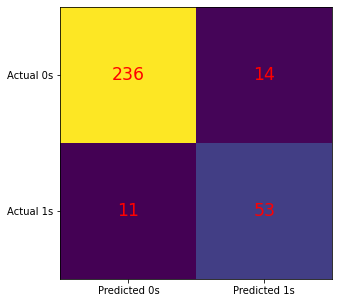

In [151]:
y_pred_sgd = pipe_sgd.predict(X_test)

conf_mat_sgd = confusion_matrix(y_test, y_pred_sgd)
matrix_confusion_tabla(y_test, y_pred_sgd)

In [152]:
TP = conf_mat_sgd[1,1]; TN = conf_mat_sgd[0,0]; FP = conf_mat_sgd[0,1]; FN = conf_mat_sgd[1,0]
print('TP:', TP, 'TN', TN, 'FP', FP, 'FN:', FN)

TP: 53 TN 236 FP 14 FN: 11


### Metricas

In [182]:
print('Specificity =', np.round(((TN) / (TN+FP))*100,2),"%")

Specificity = 96.0 %


In [183]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.79      0.83      0.81        64

    accuracy                           0.92       314
   macro avg       0.87      0.89      0.88       314
weighted avg       0.92      0.92      0.92       314



### Curva ROC

Evaluamos la performance en test usando AUC

In [196]:
clf = pipe_sgd.fit(X_train,y_train)
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model= calibrator.fit(X_train,y_train)

y_train_pred = model.predict_proba(X_train)
y_test_pred = model.predict_proba(X_test)
predict_1_class_1 = y_test_pred[:,1]
performance_1 = roc_auc_score(y_test, predict_1_class_1)
print(np.round(performance_1*100,2),"%")

95.81 %


Vamos a obtener los datos de la curva **ROC**

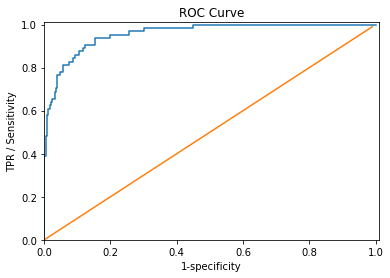

In [197]:
fpr_log_1, tpr_log_1, thr_log_1 = roc_curve(y_test, y_test_pred[:,1])
df_roc_1 = pd.DataFrame(dict(fpr=fpr_log_1,tpr = tpr_log_1, thr = thr_log_1))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1-specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_roc_1['fpr'], df_roc_1['tpr'])
plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01))

In [199]:
print('AUC = ', auc(fpr_log_1, tpr_log_1))

AUC =  0.9580625


### 2. Gradiente Boosting Classifiers 

In [202]:
pasos_gbc = (('scaler', StandardScaler()), ('gbc', GradientBoostingClassifier(criterion='squared_error', max_features='auto')))
         
pipe_gbc = Pipeline(pasos_gbc)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 56)

In [177]:
pipe_gbc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 GradientBoostingClassifier(criterion='squared_error',
                                            max_features='auto'))])

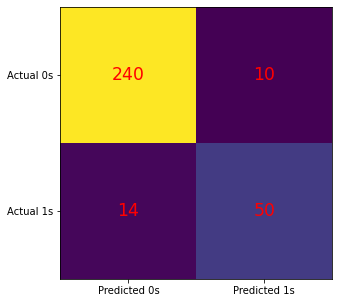

In [178]:
y_pred_gbc = pipe_gbc.predict(X_test)

conf_mat_gbc = confusion_matrix(y_test, y_pred_gbc)
matrix_confusion_tabla(y_test, y_pred_gbc)

In [179]:
TP = conf_mat_gbc[1,1]; TN = conf_mat_gbc[0,0]; FP = conf_mat_gbc[0,1]; FN = conf_mat_gbc[1,0]
print('TP:', TP, 'TN', TN, 'FP', FP, 'FN:', FN)

TP: 50 TN 240 FP 10 FN: 14


### Metricas

In [180]:
print('Specificity =', np.round(((TN) / (TN+FP))*100,2),"%")

Specificity = 96.0 %


In [181]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       250
           1       0.83      0.78      0.81        64

    accuracy                           0.92       314
   macro avg       0.89      0.87      0.88       314
weighted avg       0.92      0.92      0.92       314



### Curva ROC

Evaluamos la performance en test usando AUC

In [188]:
clf_gbc = pipe_gbc.fit(X_train,y_train)
calibrator = CalibratedClassifierCV(clf_gbc, cv='prefit')
model_gbc= calibrator.fit(X_train,y_train)

y_train_pred_gbc = model_gbc.predict_proba(X_train)
y_test_pred_gbc = model_gbc.predict_proba(X_test)
predict_2_class_1 = y_test_pred_gbc[:,1]
performance_3 = roc_auc_score(y_test, predict_2_class_1)
print(np.round(performance_2*100,2),"%")

95.45 %


Vamos a obtener los datos de la curva **ROC**

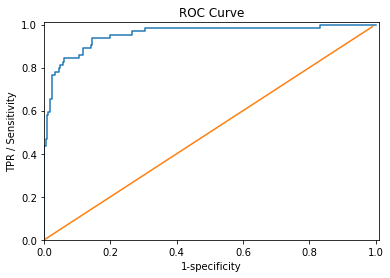

In [200]:
fpr_log_2, tpr_log_2, thr_log_2 = roc_curve(y_test, y_test_pred_gbc[:,1])
df_roc_2 = pd.DataFrame(dict(fpr=fpr_log_2, tpr = tpr_log_2, thr = thr_log_2))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1-specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_roc_2['fpr'], df_roc_2['tpr'])
plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01))

In [201]:
print('AUC = ', auc(fpr_log_2, tpr_log_2))

AUC =  0.9545


### Resultados de los modelos evaluados - Parte I

In [234]:
print("                           RESULTADOS")
print("                               SCORE   RECALL   AUC")
print("SGD Classifier                ",np.round(accuracy_score(y_test, y_pred_sgd)*100,2),"  ",
     np.round(recall_score(y_test, y_pred_sgd)*100,2),"",
      np.round(performance_1*100,2))
print("Gradient Boosting Classifier  ",np.round(accuracy_score(y_test, y_pred_gbc)*100,2),"  ",
     np.round(recall_score(y_test, y_pred_gbc)*100,2),"",
      np.round(performance_2*100,2))

                           RESULTADOS
                               SCORE   RECALL   AUC
SGD Classifier                 92.04    82.81  95.81
Gradient Boosting Classifier   92.36    78.12  95.45


Como se observa al evaluar el rendimiento de los dos modelo, el modelo **SGD Classifier** es el de mejor performance, por tener un valor alto en el **RECALL** Y en la curva ROC. 

A continuación, vamos a realiza un proceso de balanceo para evaluar si mejora el performance del modelo, sobre todo en la métrica de **Recall**

### **9. Balanceo modelo SGD Classifier**

### 1. Oversampling

Utilizaremos la técnica de Oversampling que consiste en aumentar la clase minoritaria.

In [131]:
print(pd.value_counts(df_C['y_bin'], sort = True, normalize=True))

0    0.779693
1    0.220307
Name: y_bin, dtype: float64


Se observa que nuestro dataset se encuentra muy desbalanceado y utilizaremos dos técnicas para evaluar sus rendimientos.

In [249]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(sampling_strategy='minority',random_state=123); # iguala las clases

X_train_os,y_train_os=oversampler.fit_resample(X_train, y_train);

scaler=StandardScaler()  
X_train_os_sc=scaler.fit_transform(X_train_os) # Estandarizamos los datos     
X_test_os_sc=scaler.transform(X_test)

In [239]:
print('NUEVA Composición del training set:\n', y_train_os.value_counts())

NUEVA Composición del training set:
 0    564
1    564
Name: y_bin, dtype: int64


In [240]:
print('ANTERIOR Composición del training set:\n', y_train.value_counts())

ANTERIOR Composición del training set:
 0    564
1    166
Name: y_bin, dtype: int64


In [250]:
def run_model(X_train, y_train):
    clf_base = SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.05, max_iter=100, penalty='l1')
    clf_base.fit(X_train, y_train)
    return clf_base

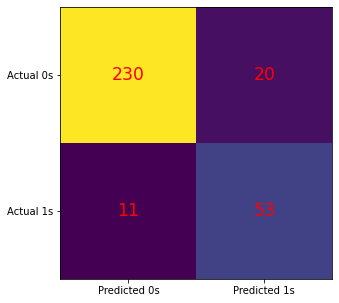

In [258]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(sampling_strategy='minority',random_state=123); # iguala las clases

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_os_sc=scaler.fit_transform(X_train_os) # Estandarizamos los datos     
X_test_os_sc=scaler.transform(X_test)

model_os = run_model(X_train_os_sc, y_train_os)
y_pred_sgd_bl_1 = model_os.predict(X_test_os_sc)
matrix_confusion_tabla(y_test,y_pred_sgd_bl_1)

In [261]:
conf_mat_sgd_bl_11 = confusion_matrix(y_test,y_pred_sgd_bl_1)
TP = conf_mat_sgd_bl_11[1,1]; TN = conf_mat_sgd_bl_11[0,0]; FP = conf_mat_sgd_bl_11[0,1]; FN = conf_mat_sgd_bl_11[1,0]
print('TP:', TP, 'TN', TN, 'FP', FP, 'FN:', FN)

TP: 53 TN 230 FP 20 FN: 11


In [262]:
print('Specificity =', np.round(((TN) / (TN+FP))*100,2),"%")

Specificity = 92.0 %


In [263]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       250
           1       0.79      0.86      0.82        64

    accuracy                           0.92       314
   macro avg       0.87      0.90      0.89       314
weighted avg       0.93      0.92      0.92       314



### Curva ROC

Evaluamos la performance en test usando AUC

In [288]:
clf_gbc_bl_1 = run_model(X_train_os_sc, y_train_os)
calibrator = CalibratedClassifierCV(clf_gbc_bl_1, cv='prefit')
model_gbc_bl_1 = calibrator.fit(X_train_os_sc,y_train_os)

y_train_pred_gbc_bl_1 = model_gbc_bl_1.predict_proba(X_train_os_sc)
y_test_pred_gbc_bl_1 = model_gbc_bl_1.predict_proba(X_test)
predict_3_class_1 = y_test_pred_gbc_bl_1[:,1]
performance_3 = roc_auc_score(y_test, predict_3_class_1)
print(np.round(performance_3*100,2),"%")

96.17 %


Vamos a obtener los datos de la curva **ROC**

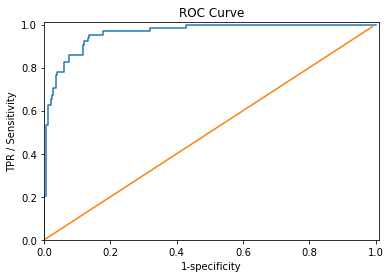

In [289]:
fpr_log_3, tpr_log_3, thr_log_3 = roc_curve(y_test, y_test_pred_gbc_bl_1[:,1])
df_roc_3 = pd.DataFrame(dict(fpr=fpr_log_3, tpr = tpr_log_3, thr = thr_log_3))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1-specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_roc_3['fpr'], df_roc_3['tpr'])
plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01))

In [266]:
print('AUC = ', auc(fpr_log_3, tpr_log_3))

AUC =  0.9648125


 ### 1. **SMOTENC**
 
 Método **SMOTENC (NC por Nominal and Continuous)** que trabaja con features continuas y categóricas.

In [270]:
from imblearn.over_sampling import SMOTENC
smote=SMOTENC(categorical_features=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                    21, 22, 23 ,24,25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                                    41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
                                    61, 62, 63, 64, 65, 66, 67,68],sampling_strategy='minority',random_state=123);

X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_sm_sc=scaler.fit_transform(X_train_sm) # Estandarizamos los datos     
X_test_sm_sc=scaler.transform(X_test)

In [271]:
print('NUEVA Composición del training set:\n', y_train_sm.value_counts())

NUEVA Composición del training set:
 0    564
1    564
Name: y_bin, dtype: int64


In [272]:
model_3 = SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.05, max_iter=100, penalty='l1')
model_3.fit(X_train_sm_sc, y_train_sm)

SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.05, max_iter=100,
              penalty='l1')

In [274]:
y_pred_sm = model_3.predict(X_test_os_sc)

In [275]:
conf_mat_3 = confusion_matrix(y_test, y_pred_sm)
conf_mat_3

array([[233,  17],
       [ 16,  48]], dtype=int64)

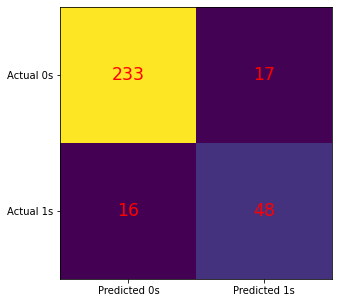

In [276]:
matrix_confusion_tabla(y_test, y_pred_sm)

In [277]:
TP = conf_mat_3[1,1]; TN = conf_mat_3[0,0]; FP = conf_mat_3[0,1]; FN = conf_mat_3[1,0]
print('TP:', TP, 'TN', TN, 'FP', FP, 'FN:', FN)

TP: 48 TN 233 FP 17 FN: 16


In [281]:
print('Specificity', np.round(((TN) / (TN+FP))*100,2),"%")

Specificity 93.2 %


In [283]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       250
           1       0.74      0.75      0.74        64

    accuracy                           0.89       314
   macro avg       0.84      0.84      0.84       314
weighted avg       0.90      0.89      0.90       314



### Curva ROC

Evaluamos la performance en test usando AUC

In [285]:
clf_gbc_bl_2 = run_model(X_train_sm_sc, y_train_sm)
calibrator = CalibratedClassifierCV(clf_gbc_bl_2, cv='prefit')
model_gbc_bl_2 = calibrator.fit(X_train_sm_sc, y_train_sm)

y_train_pred_gbc_bl_2 = model_gbc_bl_2.predict_proba(X_train_sm_sc)
y_test_pred_gbc_bl_2 = model_gbc_bl_2.predict_proba(X_test)
predict_4_class_1 = y_test_pred_gbc_bl_2[:,1]
performance_4 = roc_auc_score(y_test, predict_4_class_1)
print(np.round(performance_4*100,2),"%")

96.38 %


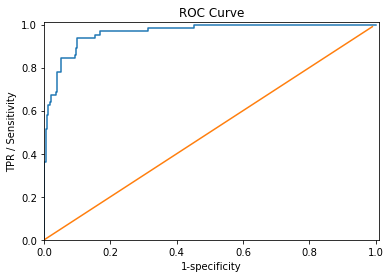

In [286]:
fpr_log_4, tpr_log_4, thr_log_4 = roc_curve(y_test, y_test_pred_gbc_bl_2[:,1])
df_roc_4 = pd.DataFrame(dict(fpr=fpr_log_4, tpr = tpr_log_4, thr = thr_log_4))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1-specificity')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_roc_4['fpr'], df_roc_4['tpr'])
plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01))

In [287]:
print('AUC = ', auc(fpr_log_4, tpr_log_4))

AUC =  0.9638125000000001


### Resultados de los modelos evaluados con Balanceo - Parte II

In [292]:
print("                           RESULTADOS")
print("                               SCORE   RECALL   AUC")
print("SGD Classifier                ",np.round(accuracy_score(y_test, y_pred_sgd)*100,2),"  ",
     np.round(recall_score(y_test, y_pred_sgd)*100,2),"",
      np.round(performance_1*100,2))
print("Oversampling                  ",np.round(accuracy_score(y_test, y_pred_sgd_bl_1)*100,2),"  ",
     np.round(recall_score(y_test, y_pred_sgd_bl_1)*100,2),"",
      np.round(performance_3*100,2))
print("SMOTENC                       ",np.round(accuracy_score(y_test, y_pred_sm)*100,2),"  ",
     np.round(recall_score(y_test, y_pred_sm)*100,2)," ",
      np.round(performance_4*100,2))

                           RESULTADOS
                               SCORE   RECALL   AUC
SGD Classifier                 92.04    82.81  95.81
Oversampling                   90.13    82.81  96.17
SMOTENC                        89.49    75.0  96.38


Consideramos que el modelo de balanceo **SMOTENC** es el mejor por tener una mayor probabilidad para predecir. Pero consideramos que el **modelo  SGD Classifier** sin balanceo nos muestra unas métricas muy confiables como para proponerlo para realizar las futuras predicciones de los estudiantes que pueden llegar a perder las notas.

## **10. Análisis de la Importancia de las features**

In [323]:
model_SGD = SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.05, max_iter=100, penalty='l1')
model_SGD.fit(X, y) 
SGD_select = pd.DataFrame({'atributo':X.columns, 'importancia': model_SGD.coef_[0]})
SGD_select.sort_values('importancia', ascending = False).iloc[0:9, :]

,atributo,importancia
0,edad,35.555961
39,curso_extra_pagado_yes,9.607990
14,educacion_madre_Superior,8.421296
58,consumo_alcohol_jornada_laboral_bajo,4.747754
18,educacion_padre_Superior,3.976676
8,tipo_poblacion_Urbano,3.379751
40,actividades_extracurriculares_yes,3.280796
55,salir_con_amigos_muy_alto,3.087604
66,estado_salud_actual_mala,2.508609


Obteniendo la evaluación de loes feactures con los coeficientes del modelo se observa que el de mayor importancia es la edad. Pero vamos a utilizar el árbol de decisión CART para que nos muestre la trazabilidad.

**Arbol de decisión CART**

Iniciamos evaluando conm GINI y luego con entropia para identicar las diferencias.

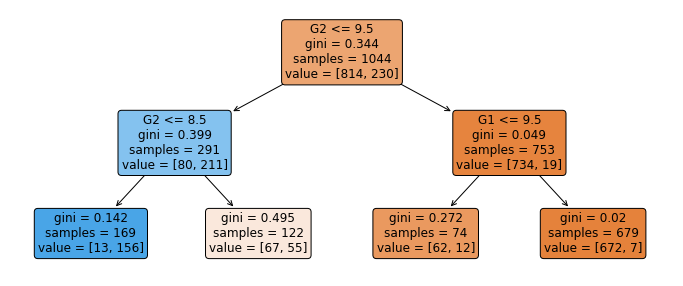

In [319]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=2)
dt.fit(X, y)

plt.figure(figsize=(12,5))  # set plot size (denoted in inches)
tree.plot_tree(dt,feature_names=df.columns[:-1],filled=True,rounded=True, fontsize=12)
plt.show()

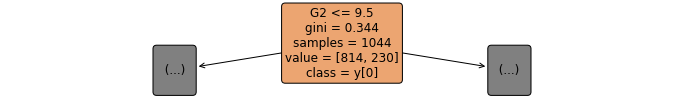

In [313]:
plt.figure(figsize=(12,1))
tree.plot_tree(dt,feature_names=df.columns[:-1],filled=True,rounded=True, impurity=True,
                fontsize=12, max_depth=0, class_names=True)
plt.show()

In [314]:
total_observaciones_clase = pd.Series(y).value_counts()
print("Total observaciones por clase"); print(total_observaciones_clase)
total_observaciones = sum(total_observaciones_clase)
print("Total observaciones",total_observaciones)
proporciones_clases = total_observaciones_clase / total_observaciones
print ("Proporciones Clases"); print (proporciones_clases)

Total observaciones por clase
0    814
1    230
Name: y_bin, dtype: int64
Total observaciones 1044
Proporciones Clases
0    0.779693
1    0.220307
Name: y_bin, dtype: float64


In [315]:
G = 1 - sum( proporciones_clases ** 2 ); print ("G: ", round(G,2))

G:  0.34


In [316]:
importancia_features = pd.DataFrame(dt.feature_importances_, index = X.columns, columns=['importancia'])
importancia_features_sort = importancia_features.sort_values('importancia', ascending=False)
importancia_features_sort[0:5]

,importancia
G2,0.895656
materia_P,0.022640
trabajo_padre_Otros,0.019670
relacion_familiar_excelente,0.015245
G1,0.013678


Ahora evaluamos con entropia.

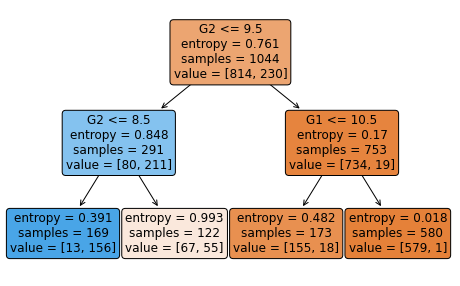

In [322]:
from sklearn import tree
dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=2)
dt_entropy.fit(X, y)

plt.figure(figsize=(8,5))
tree.plot_tree(dt_entropy,feature_names=df.columns[:-1],filled=True,rounded=True, fontsize=12)
plt.show()

No se presenta diferencia entre ambos hiperparametros , se concluye con lo mismo, el features más importante es G2 y así lo demostró desde el inicio de la evaluación de los modelos.

## **11. Principales Hallazgo**

1. Los mejores scores de los modelos se requirió como datos claves de input G1 y G2

2. Los mejores modelos fueron los de clasificación

3. El features más importante es G2

4. El balanceo aportó para el análisis, pero no se requirió cambiar el modelo elegido

5. El modelo más funcional y con las mejores métricas fue SGD Classifiers - stochastic gradient descent (SGD)